In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

2023-08-25 15:24:20.513111: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-08-25 15:24:20.545078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-25 15:24:21.074690: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [3]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [4]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

/tmp/ipykernel_2820/207623365.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)


\t\t지점번호 지점명          일시  평균기온(℃)  최고기온(℃) 최저기온(℃)
0       105  강릉  1970-01-01      3.2     10.3    -0.5
1       105  강릉  1970-01-02      1.8      5.1    -0.2
2       105  강릉  1970-01-03     -0.3      4.8    -2.2
3       105  강릉  1970-01-04     -5.9     -1.7   -12.6
4       105  강릉  1970-01-05     -7.9     -0.8   -14.7

In [5]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

일시  평균기온(℃)  최고기온(℃) 최저기온(℃)
0  1970-01-01      3.2     10.3    -0.5
1  1970-01-02      1.8      5.1    -0.2
2  1970-01-03     -0.3      4.8    -2.2
3  1970-01-04     -5.9     -1.7   -12.6
4  1970-01-05     -7.9     -0.8   -14.7

In [6]:
df

지점번호 지점명          일시  평균기온(℃)  최고기온(℃)  최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
0       105  강릉  2013-01-01     -1.9      3.8     -6.7       50.6        2.9
1       105  강릉  2013-01-02     -6.0     -1.3     -9.9       29.9        4.4
2       105  강릉  2013-01-03     -7.5     -0.7    -11.1       25.8        4.0
3       105  강릉  2013-01-04     -4.9      1.8    -10.6       31.1        3.2
4       105  강릉  2013-01-05     -1.7      2.8     -5.4       30.4        4.3
...     ...  ..         ...      ...      ...      ...        ...        ...
62059   184  제주  2023-08-11     29.6     34.1     26.6       64.6        4.0
62060   184  제주  2023-08-12     29.7     33.3     27.2       66.6        2.7
62061   184  제주  2023-08-13     29.2     32.6     26.3       65.3        3.0
62062   184  제주  2023-08-14     28.9     32.3     26.4       69.9        3.4
62063   184  제주  2023-08-15     29.4     32.0     27.0       69.9        2.8

[62064 rows x 8 columns]

In [7]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.drop(['최저기온(℃)'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

평균기온(℃)  최고기온(℃)   최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
일시                                                          
2013-01-01 -0.76250  4.43750  -6.21250   73.10000    2.33125
2013-01-02 -4.70000  0.54375  -8.98125   53.29375    3.58750
2013-01-03 -8.09375 -3.99375 -11.26250   48.90000    3.40625
2013-01-04 -6.74375 -1.15000 -11.61875   50.25000    2.03125
2013-01-05 -3.81250  1.75625  -9.41875   57.06250    2.28125
2013-01-06 -2.32500  2.52500  -5.73750   57.04375    1.96875
2013-01-07 -2.00625  3.35000  -6.72500   49.62500    1.95000
2013-01-08 -1.22500  3.76875  -5.28750   50.66250    2.15625
2013-01-09 -4.01875 -0.80625  -7.14375   45.38125    3.41250
2013-01-10 -4.78125  0.14375  -8.91250   42.67500    2.61875

In [8]:
df_korea.tail(10)

평균기온(℃)   최고기온(℃)   최저기온(℃)  평균습도(%rh)  평균풍속(m/s)
일시                                                            
2023-08-06  29.40625  33.70000  26.15625   74.78750    1.95000
2023-08-07  29.28750  33.62500  26.05625   74.49375    2.43750
2023-08-08  29.08125  33.11875  25.81875   71.57500    2.92500
2023-08-09  26.48125  28.96250  24.30625   81.06250    3.91875
2023-08-10  23.74375  25.91875  22.36875   88.73125    4.73125
2023-08-11  26.24375  29.97500  22.85625   79.02500    2.83750
2023-08-12  25.86250  29.23125  23.14375   81.25000    1.88125
2023-08-13  26.88750  31.00625  23.51875   77.77500    1.60000
2023-08-14  27.40000  31.66250  24.34375   77.50000    1.77500
2023-08-15  27.23750  31.21250  24.21250   76.58750    2.12500

In [9]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [13]:
df_temp

평균기온(℃)   최고기온(℃)
일시                            
1970-01-01   1.33125   6.86875
1970-01-02   1.86875   5.88125
1970-01-03   0.21250   4.08125
1970-01-04  -6.36250  -2.43750
1970-01-05  -9.46875  -4.73125
...              ...       ...
2023-08-11  26.24375  29.97500
2023-08-12  25.86250  29.23125
2023-08-13  26.88750  31.00625
2023-08-14  27.40000  31.66250
2023-08-15  27.23750  31.21250

[19585 rows x 2 columns]

In [12]:
filter2 = df_temp.index == '1974-10-16' 
df_temp[filter2]

평균기온(℃)  최고기온(℃)
일시                          
1974-10-16  13.6625  20.7875

In [13]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [14]:
df_korea = df_korea.reset_index()

In [15]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


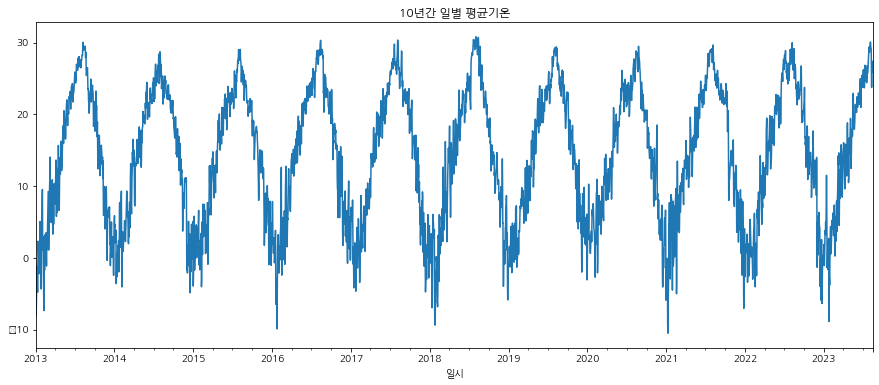

In [16]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


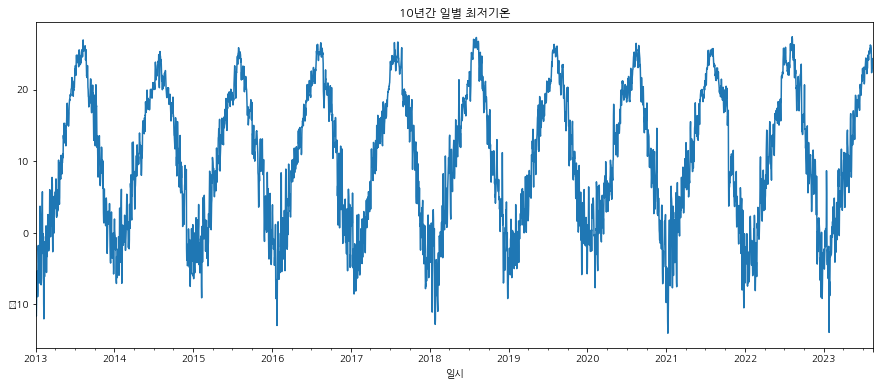

In [17]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

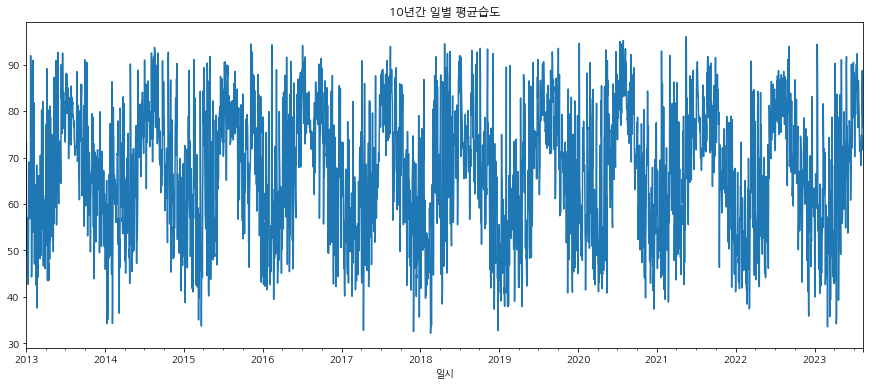

In [18]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

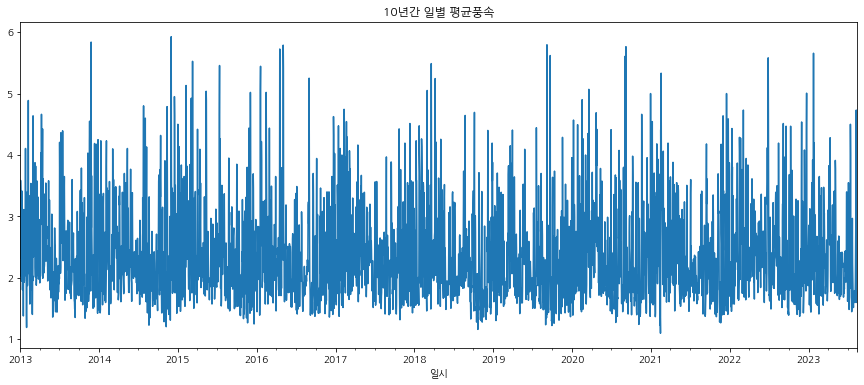

In [19]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [20]:
n_col = 1
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 2)

In [21]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [22]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [23]:
scaled_data

array([[0.28644888, 0.31922063],
       [0.29945554, 0.29607384],
       [0.25937689, 0.25388222],
       ...,
       [0.90486993, 0.88499854],
       [0.91727163, 0.9003809 ],
       [0.91333938, 0.88983299]])

In [24]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 2)

## Creating Data Set

In [25]:
x_train = []
y_train = []
time_step = 60
n_col = 2

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

60 60
x_train :  [array([[0.28644888, 0.31922063],
       [0.29945554, 0.29607384],
       [0.25937689, 0.25388222],
       [0.10027223, 0.10108409],
       [0.02510587, 0.04731907],
       [0.24319419, 0.25754468],
       [0.22837266, 0.23513038],
       [0.23835451, 0.25388222],
       [0.17211131, 0.16319953],
       [0.20220811, 0.21432757],
       [0.23275862, 0.25212423],
       [0.33318209, 0.35159684],
       [0.15366001, 0.17096396],
       [0.09195402, 0.10225608],
       [0.06488203, 0.05288602],
       [0.05792498, 0.08980369],
       [0.0738052 , 0.09449165],
       [0.12885662, 0.18678582],
       [0.17029643, 0.20773513],
       [0.1822444 , 0.22121301],
       [0.22081065, 0.27175505],
       [0.28055051, 0.32390858],
       [0.25831821, 0.25637269],
       [0.17422868, 0.20700264],
       [0.20886267, 0.27702901],
       [0.2484876 , 0.32566657],
       [0.29401089, 0.34852036],
       [0.3200242 , 0.39789042],
       [0.32577132, 0.39320246],
       [0.31064731, 0.288

60 3876
60 3877
60 3878
60 3879
60 3880
60 3881
60 3882
60 3883
60 3884
60 3885
60 3886
60 3887
60 3888
60 3889
60 3890
60 3891
60 3892
60 3893
60 3894
60 3895
60 3896
60 3897
60 3898
60 3899
60 3900
60 3901
60 3902
60 3903
60 3904
60 3905
60 3906
60 3907
60 3908
60 3909
60 3910
60 3911
60 3912
60 3913
60 3914
60 3915
60 3916
60 3917
60 3918
60 3919
60 3920
60 3921
60 3922
60 3923
60 3924
60 3925
60 3926
60 3927
60 3928
60 3929
60 3930
60 3931
60 3932
60 3933
60 3934
60 3935
60 3936
60 3937
60 3938
60 3939
60 3940
60 3941
60 3942
60 3943
60 3944
60 3945
60 3946
60 3947
60 3948
60 3949
60 3950
60 3951
60 3952
60 3953
60 3954
60 3955
60 3956
60 3957
60 3958
60 3959
60 3960
60 3961
60 3962
60 3963
60 3964
60 3965
60 3966
60 3967
60 3968
60 3969
60 3970
60 3971
60 3972
60 3973
60 3974
60 3975
60 3976
60 3977
60 3978
60 3979
60 3980
60 3981
60 3982
60 3983
60 3984
60 3985
60 3986
60 3987
60 3988
60 3989
60 3990
60 3991
60 3992
60 3993
60 3994
60 3995
60 3996
60 3997
60 3998
60 3999
60 4000


60 7262
60 7263
60 7264
60 7265
60 7266
60 7267
60 7268
60 7269
60 7270
60 7271
60 7272
60 7273
60 7274
60 7275
60 7276
60 7277
60 7278
60 7279
60 7280
60 7281
60 7282
60 7283
60 7284
60 7285
60 7286
60 7287
60 7288
60 7289
60 7290
60 7291
60 7292
60 7293
60 7294
60 7295
60 7296
60 7297
60 7298
60 7299
60 7300
60 7301
60 7302
60 7303
60 7304
60 7305
60 7306
60 7307
60 7308
60 7309
60 7310
60 7311
60 7312
60 7313
60 7314
60 7315
60 7316
60 7317
60 7318
60 7319
60 7320
60 7321
60 7322
60 7323
60 7324
60 7325
60 7326
60 7327
60 7328
60 7329
60 7330
60 7331
60 7332
60 7333
60 7334
60 7335
60 7336
60 7337
60 7338
60 7339
60 7340
60 7341
60 7342
60 7343
60 7344
60 7345
60 7346
60 7347
60 7348
60 7349
60 7350
60 7351
60 7352
60 7353
60 7354
60 7355
60 7356
60 7357
60 7358
60 7359
60 7360
60 7361
60 7362
60 7363
60 7364
60 7365
60 7366
60 7367
60 7368
60 7369
60 7370
60 7371
60 7372
60 7373
60 7374
60 7375
60 7376
60 7377
60 7378
60 7379
60 7380
60 7381
60 7382
60 7383
60 7384
60 7385
60 7386


60 11273
60 11274
60 11275
60 11276
60 11277
60 11278
60 11279
60 11280
60 11281
60 11282
60 11283
60 11284
60 11285
60 11286
60 11287
60 11288
60 11289
60 11290
60 11291
60 11292
60 11293
60 11294
60 11295
60 11296
60 11297
60 11298
60 11299
60 11300
60 11301
60 11302
60 11303
60 11304
60 11305
60 11306
60 11307
60 11308
60 11309
60 11310
60 11311
60 11312
60 11313
60 11314
60 11315
60 11316
60 11317
60 11318
60 11319
60 11320
60 11321
60 11322
60 11323
60 11324
60 11325
60 11326
60 11327
60 11328
60 11329
60 11330
60 11331
60 11332
60 11333
60 11334
60 11335
60 11336
60 11337
60 11338
60 11339
60 11340
60 11341
60 11342
60 11343
60 11344
60 11345
60 11346
60 11347
60 11348
60 11349
60 11350
60 11351
60 11352
60 11353
60 11354
60 11355
60 11356
60 11357
60 11358
60 11359
60 11360
60 11361
60 11362
60 11363
60 11364
60 11365
60 11366
60 11367
60 11368
60 11369
60 11370
60 11371
60 11372
60 11373
60 11374
60 11375
60 11376
60 11377
60 11378
60 11379
60 11380
60 11381
60 11382
60 11383
6

60 15051
60 15052
60 15053
60 15054
60 15055
60 15056
60 15057
60 15058
60 15059
60 15060
60 15061
60 15062
60 15063
60 15064
60 15065
60 15066
60 15067
60 15068
60 15069
60 15070
60 15071
60 15072
60 15073
60 15074
60 15075
60 15076
60 15077
60 15078
60 15079
60 15080
60 15081
60 15082
60 15083
60 15084
60 15085
60 15086
60 15087
60 15088
60 15089
60 15090
60 15091
60 15092
60 15093
60 15094
60 15095
60 15096
60 15097
60 15098
60 15099
60 15100
60 15101
60 15102
60 15103
60 15104
60 15105
60 15106
60 15107
60 15108
60 15109
60 15110
60 15111
60 15112
60 15113
60 15114
60 15115
60 15116
60 15117
60 15118
60 15119
60 15120
60 15121
60 15122
60 15123
60 15124
60 15125
60 15126
60 15127
60 15128
60 15129
60 15130
60 15131
60 15132
60 15133
60 15134
60 15135
60 15136
60 15137
60 15138
60 15139
60 15140
60 15141
60 15142
60 15143
60 15144
60 15145
60 15146
60 15147
60 15148
60 15149
60 15150
60 15151
60 15152
60 15153
60 15154
60 15155
60 15156
60 15157
60 15158
60 15159
60 15160
60 15161
6

60 18659
60 18660
60 18661
60 18662
60 18663
60 18664
60 18665
60 18666
60 18667
60 18668
60 18669
60 18670
60 18671
60 18672
60 18673
60 18674
60 18675
60 18676
60 18677
60 18678
60 18679
60 18680
60 18681
60 18682
60 18683
60 18684
60 18685
60 18686
60 18687
60 18688
60 18689
60 18690
60 18691
60 18692
60 18693
60 18694
60 18695
60 18696
60 18697
60 18698
60 18699
60 18700
60 18701
60 18702
60 18703
60 18704
60 18705
60 18706
60 18707
60 18708
60 18709
60 18710
60 18711
60 18712
60 18713
60 18714
60 18715
60 18716
60 18717
60 18718
60 18719
60 18720
60 18721
60 18722
60 18723
60 18724
60 18725
60 18726
60 18727
60 18728
60 18729
60 18730
60 18731
60 18732
60 18733
60 18734
60 18735
60 18736
60 18737
60 18738
60 18739
60 18740
60 18741
60 18742
60 18743
60 18744
60 18745
60 18746
60 18747
60 18748
60 18749
60 18750
60 18751
60 18752
60 18753
60 18754
60 18755
60 18756
60 18757
60 18758
60 18759
60 18760
60 18761
60 18762
60 18763
60 18764
60 18765
60 18766
60 18767
60 18768
60 18769
6

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [28]:
x_train.shape, y_train.shape

((19525, 60, 2), (19525, 2))

In [83]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(50, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(50, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(64, return_sequences = False, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 60, 50)            10600     
                                                                 
 lstm_9 (LSTM)               (None, 60, 64)            29440     
                                                                 
 lstm_10 (LSTM)              (None, 60, 50)            23000     
                                                                 
 lstm_11 (LSTM)              (None, 64)                29440     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 2)                

In [84]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [85]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
611/611 [==============================] - 27s 40ms/step - loss: 0.0229 - mae: 0.1113
Epoch 2/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0090 - mae: 0.0741
Epoch 3/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0132 - mae: 0.0689
Epoch 4/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0516 - mae: 0.0705
Epoch 5/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0090 - mae: 0.0658
Epoch 6/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0065 - mae: 0.0633
Epoch 7/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0063 - mae: 0.0617
Epoch 8/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0063 - mae: 0.0607
Epoch 9/30
611/611 [==============================] - 25s 41ms/step - loss: 0.0061 - mae: 0.0605
Epoch 10/30
611/611 [==============================] - 25s 40ms/step - loss: 0.0060 - mae: 0.0601
Epoch 11/30
611/611 [========

In [86]:
m_lstm.save('m3_lstm_adam.h5')

In [29]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

2023-08-25 01:04:46.042816: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Text(0, 0.5, 'Losses')

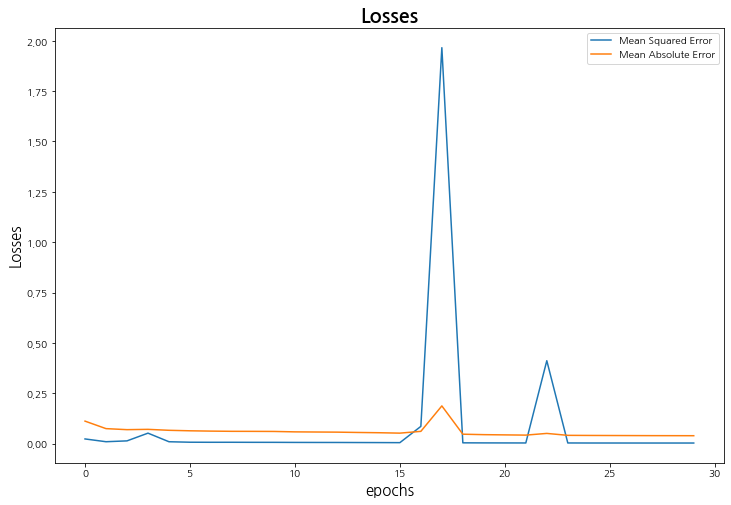

In [88]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [30]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.38793103, 0.42836214],
        [0.49213551, 0.4557574 ],
        [0.3008167 , 0.35174333],
        ...,
        [0.33076225, 0.333431  ],
        [0.32410768, 0.31526516],
        [0.42301875, 0.4890126 ]],

       [[0.49213551, 0.4557574 ],
        [0.3008167 , 0.35174333],
        [0.1991833 , 0.19425725],
        ...,
        [0.32410768, 0.31526516],
        [0.42301875, 0.4890126 ],
        [0.53962492, 0.58804571]],

       [[0.3008167 , 0.35174333],
        [0.1991833 , 0.19425725],
        [0.21279492, 0.21432757],
        ...,
        [0.42301875, 0.4890126 ],
        [0.53962492, 0.58804571],
        [0.38430127, 0.38397304]],

       ...,

       [[0.77208106, 0.77234105],
        [0.77283727, 0.77658951],
        [0.82320024, 0.8448579 ],
        ...,
        [0.82879613, 0.76574861],
        [0.8892922 , 0.86082625],
        [0.88006655, 0.84339291]],

       [[0.77283727, 0.77658951],
        [0.82320024, 0.8448579 ],
        [0.84664247, 0.86595371],
        .

In [31]:
m_lstm_Adam.evaluate(x_test, y_test)

154/154 [==============================] - 2s 12ms/step - loss: 0.0025 - mae: 0.0364


[0.0024569034576416016, 0.03639410808682442]

In [32]:
pred = m_lstm_Adam.predict(x_test)
pred

154/154 [==============================] - 2s 12ms/step


array([[0.49895006, 0.5172832 ],
       [0.5620914 , 0.57948464],
       [0.3762622 , 0.3973028 ],
       ...,
       [0.8698253 , 0.8484869 ],
       [0.9146775 , 0.8878693 ],
       [0.9124218 , 0.88559574]], dtype=float32)

In [33]:
pred.shape

(4897, 2)

In [34]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 2)


array([[10.112861 , 15.318595 ],
       [12.7221775, 17.972263 ],
       [ 5.042785 , 10.199931 ],
       ...,
       [25.43928  , 29.448572 ],
       [27.292797 , 31.128725 ],
       [27.199581 , 31.031729 ]], dtype=float32)

In [35]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ],
       [ 5.375  ,  9.63125],
       [ 5.3625 ,  8.70625],
       ...,
       [26.8875 , 31.00625],
       [27.4    , 31.6625 ],
       [27.2375 , 31.2125 ]])

In [36]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [37]:
#pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
#y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

pred.columns = ['예측평균기온', '예측최고기온']
y_test.columns = ['실제평균기온', '실제최고기온']

In [38]:
df_pred = pd.concat((pred, y_test), axis = 1)
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

예측평균기온    실제평균기온     예측최고기온    실제최고기온
0     10.112861  11.79375  15.318595  18.33750
1     12.722178   5.37500  17.972263   9.63125
2      5.042785   5.36250  10.199931   8.70625
3      6.399034   7.25625  11.639179  11.08125
4      7.771291   8.90625  13.003963  12.89375
...         ...       ...        ...       ...
4892  24.334560  26.24375  28.415321  29.97500
4893  27.210373  25.86250  31.043779  29.23125
4894  25.439280  26.88750  29.448572  31.00625
4895  27.292797  27.40000  31.128725  31.66250
4896  27.199581  27.23750  31.031729  31.21250

[4897 rows x 4 columns]

Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


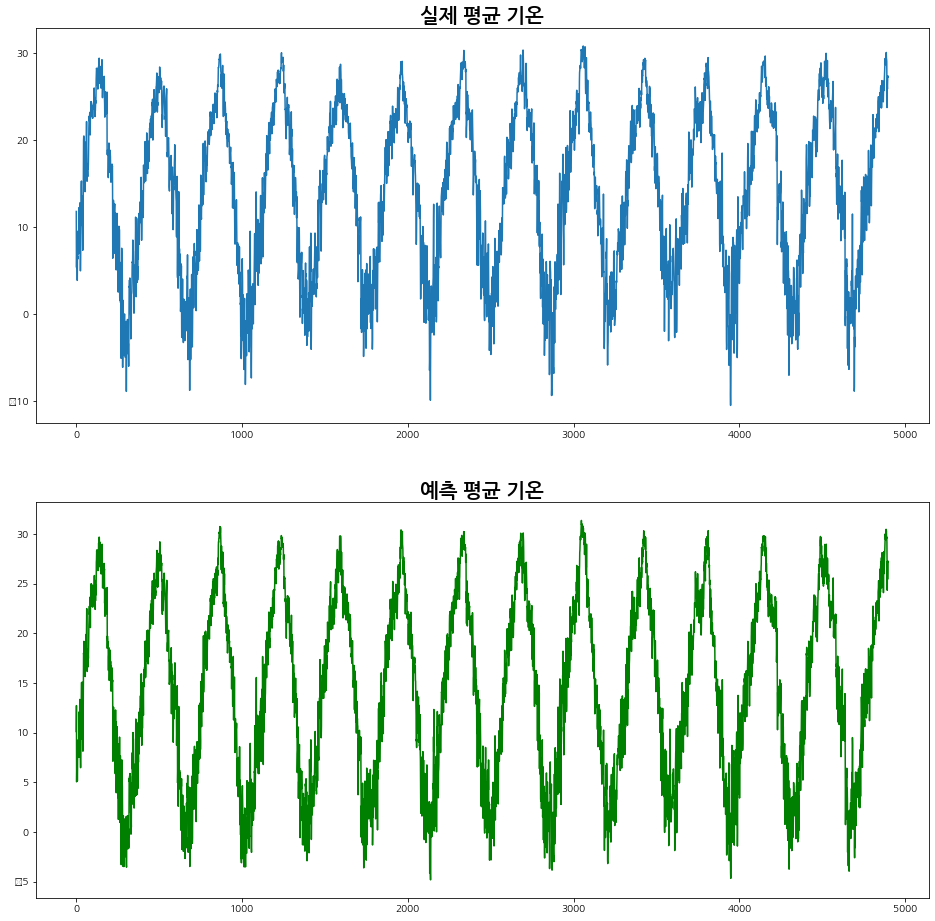

In [39]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

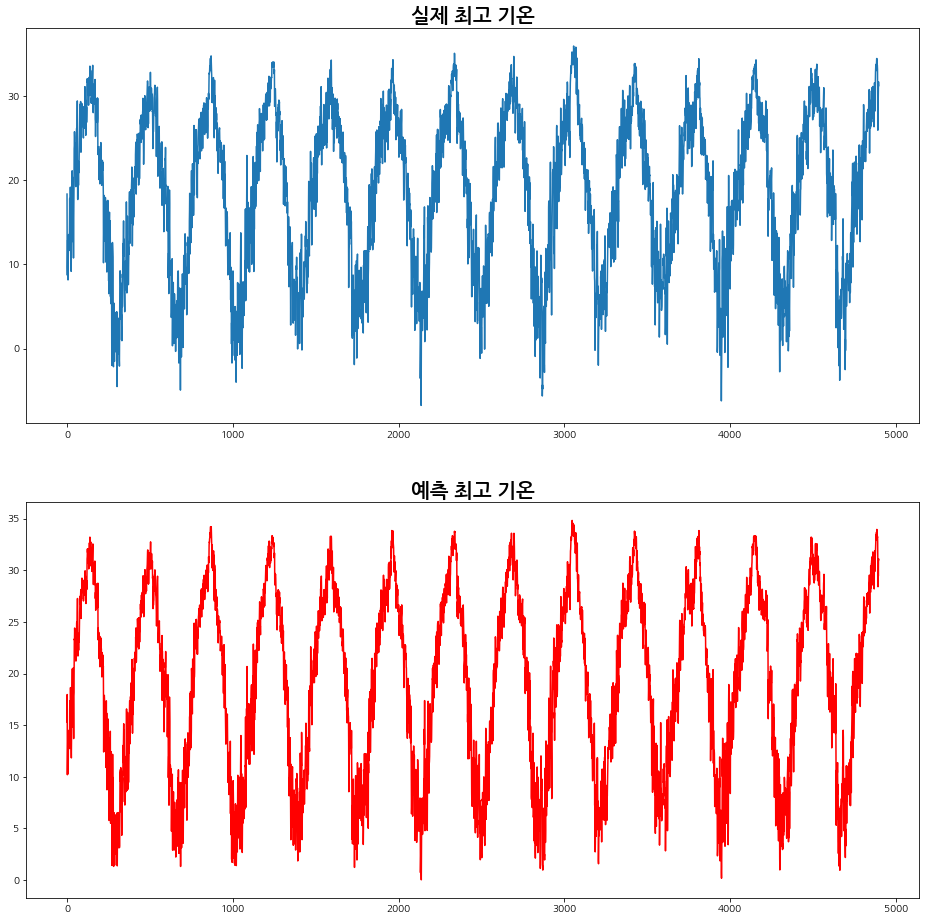

In [40]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

In [48]:
"""
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')
"""

"\nfig, axe = plt.subplots(2,1, figsize = (16, 16))\naxe[0].plot(df_pred['실제최저기온'])\naxe[1].plot(df_pred['예측최저기온'], c = 'b')\n\naxe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')\naxe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')\n"

In [41]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2030-08-15
2556


In [42]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335]

In [43]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.82320024, 0.8448579 ],
       [0.84664247, 0.86595371],
       [0.85012099, 0.86346323],
       [0.85904416, 0.87884559],
       [0.81261343, 0.77981248],
       [0.76149425, 0.70216818],
       [0.80490018, 0.7890419 ],
       [0.82698125, 0.82127161],
       [0.8399879 , 0.84207442],
       [0.84497883, 0.83899795],
       [0.83514822, 0.77131556],
       [0.87008469, 0.84837386],
       [0.84694495, 0.81380018],
       [0.85344828, 0.78757691],
       [0.82879613, 0.777322  ],
       [0.86358137, 0.85701729],
       [0.88384755, 0.87503662],
       [0.888536  , 0.87283914],
       [0.85269208, 0.7998828 ],
       [0.87265578, 0.8444184 ],
       [0.88944344, 0.88397304],
       [0.82758621, 0.7998828 ],
       [0.83064126, 0.80706124],
       [0.87341198, 0.83621447],
       [0.90381125, 0.88734251],
       [0.85949788, 0.81292118],
       [0.88732607, 0.85833577],
       [0.87855414, 0.79475535],
       [0.87068966, 0.7884559 ],
       [0.87114338, 0.7998828 ],
       [0.

In [44]:
for i in range(time_step, d_day):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_Adam.predict(array)[0]))
    print(len(last_array))

60 60
[[0.82320024 0.8448579 ]
 [0.84664247 0.86595371]
 [0.85012099 0.86346323]
 [0.85904416 0.87884559]
 [0.81261343 0.77981248]
 [0.76149425 0.70216818]
 [0.80490018 0.7890419 ]
 [0.82698125 0.82127161]
 [0.8399879  0.84207442]
 [0.84497883 0.83899795]
 [0.83514822 0.77131556]
 [0.87008469 0.84837386]
 [0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.8740

1/1 [==============================] - 0s 19ms/step
66
60 66
[[0.80490018 0.7890419 ]
 [0.82698125 0.82127161]
 [0.8399879  0.84207442]
 [0.84497883 0.83899795]
 [0.83514822 0.77131556]
 [0.87008469 0.84837386]
 [0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0

1/1 [==============================] - 0s 21ms/step
72
60 72
[[0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0

1/1 [==============================] - 0s 17ms/step
78
60 78
[[0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0

1/1 [==============================] - 0s 17ms/step
84
60 84
[[0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0

1/1 [==============================] - 0s 19ms/step
90
60 90
[[0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0

1/1 [==============================] - 0s 19ms/step
96
60 96
[[0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0

1/1 [==============================] - 0s 16ms/step
102
60 102
[[0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219

1/1 [==============================] - 0s 17ms/step
108
60 108
[[0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125 

1/1 [==============================] - 0s 19ms/step
114
60 114
[[0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011 

1/1 [==============================] - 0s 18ms/step
120
60 120
[[0.91242182 0.88559574]
 [0.90331709 0.87752599]
 [0.89845639 0.87327868]
 [0.89404756 0.86946142]
 [0.88875252 0.86488897]
 [0.88323969 0.86011523]
 [0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859

1/1 [==============================] - 0s 20ms/step
126
60 126
[[0.87801135 0.85558188]
 [0.87218541 0.85059386]
 [0.86571038 0.84505069]
 [0.8596518  0.83985162]
 [0.8545078  0.83545458]
 [0.84948176 0.83116996]
 [0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433 

1/1 [==============================] - 0s 18ms/step
132
60 132
[[0.84414804 0.82664585]
 [0.83859199 0.821917  ]
 [0.83266437 0.81691861]
 [0.82706165 0.81224626]
 [0.8216148  0.80772698]
 [0.81578439 0.80286813]
 [0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652

1/1 [==============================] - 0s 19ms/step
138
60 138
[[0.80959493 0.79772496]
 [0.80340219 0.79258257]
 [0.79736888 0.78753555]
 [0.79153353 0.78271049]
 [0.78606486 0.77816427]
 [0.78098148 0.7739656 ]
 [0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737

1/1 [==============================] - 0s 16ms/step
144
60 144
[[0.77619433 0.77003318]
 [0.7718125  0.76648515]
 [0.76757514 0.76300526]
 [0.76351708 0.75969172]
 [0.75964808 0.75652587]
 [0.75590944 0.75346416]
 [0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369

1/1 [==============================] - 0s 19ms/step
150
60 150
[[0.75233132 0.75055009]
 [0.7487011  0.74754125]
 [0.74516022 0.7446478 ]
 [0.74152505 0.74162751]
 [0.73773688 0.73848146]
 [0.73375332 0.73521137]
 [0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986

1/1 [==============================] - 0s 18ms/step
156
60 156
[[0.729554   0.73177451]
 [0.72499859 0.72805005]
 [0.72025049 0.72416335]
 [0.71471453 0.71952701]
 [0.70861703 0.71440518]
 [0.70210171 0.70892364]
 [0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954

1/1 [==============================] - 0s 18ms/step
162
60 162
[[0.69537187 0.70325798]
 [0.6884433  0.6974296 ]
 [0.68132031 0.6914472 ]
 [0.67354065 0.68491024]
 [0.66526473 0.67798018]
 [0.65708137 0.67115843]
 [0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658

1/1 [==============================] - 0s 18ms/step
168
60 168
[[0.64998746 0.66528857]
 [0.64411652 0.66050398]
 [0.63936585 0.65669525]
 [0.63558954 0.65369588]
 [0.63241106 0.65115219]
 [0.62909991 0.64840817]
 [0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708

1/1 [==============================] - 0s 23ms/step
174
60 174
[[0.62520182 0.64508533]
 [0.62064737 0.64109719]
 [0.61551803 0.63633585]
 [0.6103273  0.63147736]
 [0.60463887 0.62617332]
 [0.59843153 0.61992449]
 [0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891

1/1 [==============================] - 0s 17ms/step
180
60 180
[[0.59167153 0.61314434]
 [0.58479369 0.60623378]
 [0.57799041 0.59937596]
 [0.57120132 0.59252   ]
 [0.56439203 0.58564812]
 [0.55762213 0.57880068]
 [0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653

1/1 [==============================] - 0s 18ms/step
186
60 186
[[0.55105573 0.57191283]
 [0.54452986 0.56505334]
 [0.53800434 0.55817842]
 [0.53158069 0.55139476]
 [0.52526045 0.54471874]
 [0.51894999 0.53805161]
 [0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434

1/1 [==============================] - 0s 17ms/step
192
60 192
[[0.51264781 0.53139573]
 [0.50637954 0.52476692]
 [0.50020516 0.51823127]
 [0.49397916 0.51169413]
 [0.48775822 0.50516039]
 [0.48157161 0.49865985]
 [0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787 

1/1 [==============================] - 0s 21ms/step
198
60 198
[[0.475339   0.49212256]
 [0.46934658 0.4858264 ]
 [0.46354246 0.47971302]
 [0.45770913 0.47356755]
 [0.45179951 0.46734795]
 [0.44580847 0.46103939]
 [0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265

1/1 [==============================] - 0s 17ms/step
204
60 204
[[0.43978959 0.45469931]
 [0.43367708 0.44830096]
 [0.42749244 0.44184977]
 [0.42115808 0.43527263]
 [0.41467214 0.42858198]
 [0.40812743 0.42184618]
 [0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918

1/1 [==============================] - 0s 17ms/step
210
60 210
[[0.40157932 0.41513515]
 [0.39508891 0.40851033]
 [0.38873488 0.40205103]
 [0.38258129 0.39581621]
 [0.37665737 0.38984665]
 [0.37102592 0.38418618]
 [0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224

1/1 [==============================] - 0s 18ms/step
216
60 216
[[0.36577308 0.37891996]
 [0.36076653 0.37369218]
 [0.35575247 0.36843228]
 [0.35084927 0.36331022]
 [0.34614176 0.35841393]
 [0.34164679 0.35375464]
 [0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171

1/1 [==============================] - 0s 16ms/step
222
60 222
[[0.33736211 0.3493292 ]
 [0.33325434 0.34510222]
 [0.32920277 0.34111172]
 [0.32528934 0.33730841]
 [0.32160932 0.33374691]
 [0.31820911 0.3304725 ]
 [0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846

1/1 [==============================] - 0s 18ms/step
228
60 228
[[0.31504667 0.32770783]
 [0.3123787  0.32543972]
 [0.31034666 0.32376394]
 [0.30890986 0.32265386]
 [0.30800581 0.32204083]
 [0.30751216 0.32179886]
 [0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852

1/1 [==============================] - 0s 19ms/step
234
60 234
[[0.30733198 0.32183859]
 [0.30756265 0.32224718]
 [0.30818993 0.32300398]
 [0.30906466 0.3239693 ]
 [0.31011385 0.32505992]
 [0.31134385 0.32630101]
 [0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424

1/1 [==============================] - 0s 18ms/step
240
60 240
[[0.31294334 0.32785827]
 [0.31478918 0.32962853]
 [0.31674927 0.33147454]
 [0.31872493 0.33332121]
 [0.32077369 0.33521122]
 [0.32287794 0.33713308]
 [0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556 

1/1 [==============================] - 0s 22ms/step
246
60 246
[[0.32507917 0.33921978]
 [0.32758224 0.34171313]
 [0.33041358 0.34464598]
 [0.3334527  0.34784374]
 [0.33664799 0.35121074]
 [0.33989778 0.35462844]
 [0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235

1/1 [==============================] - 0s 19ms/step
252
60 252
[[0.34310877 0.35800424]
 [0.34624171 0.3612909 ]
 [0.34921086 0.36439839]
 [0.35196835 0.36727503]
 [0.35459691 0.37001082]
 [0.3571133  0.37258846]
 [0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639

1/1 [==============================] - 0s 19ms/step
258
60 258
[[0.35930896 0.37473366]
 [0.36130846 0.37667763]
 [0.36342722 0.37873313]
 [0.3658182  0.38105556]
 [0.36851674 0.38368362]
 [0.37127554 0.38637018]
 [0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564

1/1 [==============================] - 0s 22ms/step
264
60 264
[[0.37380195 0.38882652]
 [0.37623852 0.39120436]
 [0.37897348 0.39388722]
 [0.38225919 0.39711374]
 [0.38646579 0.40127271]
 [0.39165211 0.40651193]
 [0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984

1/1 [==============================] - 0s 18ms/step
270
60 270
[[0.3980419  0.41313377]
 [0.40582424 0.42135406]
 [0.41465592 0.43077928]
 [0.42410469 0.44087839]
 [0.43394709 0.45107046]
 [0.44364053 0.46111891]
 [0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216

1/1 [==============================] - 0s 17ms/step
276
60 276
[[0.45245999 0.47029376]
 [0.4604556  0.47861496]
 [0.46786207 0.48631987]
 [0.47481281 0.49355406]
 [0.48145556 0.50048226]
 [0.48775226 0.5070796 ]
 [0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453

1/1 [==============================] - 0s 18ms/step
282
60 282
[[0.4938876  0.51350826]
 [0.50002235 0.51990753]
 [0.50614893 0.52631181]
 [0.51238024 0.53283042]
 [0.51884753 0.53961569]
 [0.52554679 0.54664934]
 [0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352

1/1 [==============================] - 0s 17ms/step
288
60 288
[[0.53256053 0.55400705]
 [0.53986639 0.56164068]
 [0.54759949 0.5696578 ]
 [0.55558336 0.57787544]
 [0.56411475 0.58624268]
 [0.57304794 0.59495705]
 [0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345

1/1 [==============================] - 0s 27ms/step
294
60 294
[[0.58233827 0.60397899]
 [0.59189564 0.6132316 ]
 [0.60149735 0.62251574]
 [0.61094016 0.63174886]
 [0.6185385  0.63969576]
 [0.62496608 0.64642143]
 [0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415

1/1 [==============================] - 0s 18ms/step
300
60 300
[[0.6308558  0.65256512]
 [0.63655984 0.65849972]
 [0.64225513 0.66398311]
 [0.64788508 0.66884983]
 [0.65325081 0.67349541]
 [0.65851325 0.67805779]
 [0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983

1/1 [==============================] - 0s 20ms/step
306
60 306
[[0.66371155 0.68256974]
 [0.66886216 0.68704444]
 [0.67395329 0.69146955]
 [0.67898703 0.69584411]
 [0.68403667 0.70023042]
 [0.68902618 0.70456314]
 [0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753

1/1 [==============================] - 0s 17ms/step
312
60 312
[[0.69390589 0.70879805]
 [0.69865453 0.71291625]
 [0.70354992 0.71715355]
 [0.7086823  0.72158319]
 [0.71387661 0.72605556]
 [0.71921754 0.7306366 ]
 [0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548

1/1 [==============================] - 0s 18ms/step
318
60 318
[[0.72463065 0.73525894]
 [0.73003352 0.73985076]
 [0.73539776 0.74438792]
 [0.74070418 0.74885458]
 [0.74594879 0.75324857]
 [0.75112045 0.75756168]
 [0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445

1/1 [==============================] - 0s 20ms/step
324
60 324
[[0.75622302 0.76179814]
 [0.76119345 0.76590478]
 [0.76582462 0.76976389]
 [0.77010572 0.77337486]
 [0.77413517 0.77679676]
 [0.77793813 0.78003311]
 [0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517

1/1 [==============================] - 0s 18ms/step
330
60 330
[[0.78142238 0.78298968]
 [0.78448415 0.78557217]
 [0.78707868 0.78774148]
 [0.78916329 0.78946334]
 [0.7907533  0.79076141]
 [0.79191482 0.79169804]
 [0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376  

1/1 [==============================] - 0s 17ms/step
336
60 336
[[0.79268062 0.7922985 ]
 [0.79310983 0.79261166]
 [0.79334337 0.79275346]
 [0.79347968 0.79280204]
 [0.79360461 0.79282176]
 [0.79388183 0.79294378]
 [0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433

1/1 [==============================] - 0s 18ms/step
342
60 342
[[0.79359227 0.792548  ]
 [0.79303753 0.79190016]
 [0.79254758 0.79129064]
 [0.79222828 0.79083192]
 [0.79218125 0.79060221]
 [0.79255641 0.7907117 ]
 [0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859

1/1 [==============================] - 0s 20ms/step
348
60 348
[[0.79352748 0.79129928]
 [0.79538548 0.79262137]
 [0.79817557 0.79466581]
 [0.80205089 0.79752249]
 [0.8071245  0.80122137]
 [0.81337768 0.80576122]
 [0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224 

1/1 [==============================] - 0s 18ms/step
354
60 354
[[0.8206476  0.81123853]
 [0.82859445 0.81736046]
 [0.83686209 0.82381272]
 [0.84556544 0.83071065]
 [0.85497952 0.8382653 ]
 [0.86530036 0.84659219]
 [0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308

1/1 [==============================] - 0s 18ms/step
360
60 360
[[0.87668252 0.85577935]
 [0.88921517 0.86591595]
 [0.90289611 0.87702984]
 [0.91755414 0.88898861]
 [0.93281013 0.90153706]
 [0.94824857 0.9144004 ]
 [0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464

1/1 [==============================] - 0s 17ms/step
366
60 366
[[0.96332353 0.92709827]
 [0.976376   0.93903244]
 [0.98793155 0.94971037]
 [0.99818742 0.959288  ]
 [1.00686538 0.96748751]
 [1.01299942 0.97364724]
 [1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326

1/1 [==============================] - 0s 18ms/step
372
60 372
[[1.01615644 0.97741139]
 [1.01671433 0.97922337]
 [1.01734781 0.98098868]
 [1.01850629 0.98131943]
 [1.01771533 0.97995704]
 [1.01540756 0.97721976]
 [1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903 

1/1 [==============================] - 0s 18ms/step
378
60 378
[[1.01219308 0.97381431]
 [1.00799859 0.96978033]
 [1.00283289 0.96510226]
 [0.997172   0.96022433]
 [0.99168986 0.95565999]
 [0.98626763 0.95134199]
 [0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745

1/1 [==============================] - 0s 17ms/step
384
60 384
[[0.98058242 0.9468472 ]
 [0.9744224  0.94224751]
 [0.96807086 0.93738788]
 [0.96225983 0.93154323]
 [0.9563033  0.92550945]
 [0.95039564 0.9194898 ]
 [0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813

1/1 [==============================] - 0s 19ms/step
390
60 390
[[0.94423115 0.91350889]
 [0.93762308 0.90756673]
 [0.93112576 0.90173793]
 [0.92409617 0.89577091]
 [0.9184525  0.89099544]
 [0.91323912 0.88663614]
 [0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853 

1/1 [==============================] - 0s 17ms/step
396
60 396
[[0.90747148 0.88179529]
 [0.90102464 0.87635243]
 [0.89400977 0.87040251]
 [0.88664991 0.86415702]
 [0.87822545 0.85700244]
 [0.8680318  0.84833008]
 [0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984 

1/1 [==============================] - 0s 18ms/step
402
60 402
[[0.85705024 0.83898103]
 [0.84659326 0.83008283]
 [0.83723974 0.82213533]
 [0.82942677 0.81553143]
 [0.82287663 0.81000912]
 [0.81701869 0.80506849]
 [0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751

1/1 [==============================] - 0s 18ms/step
408
60 408
[[0.81156421 0.80047518]
 [0.8064903  0.79620218]
 [0.80179667 0.79224753]
 [0.79741293 0.78855312]
 [0.79332811 0.7851159 ]
 [0.78945684 0.78184795]
 [0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873

1/1 [==============================] - 0s 20ms/step
414
60 414
[[0.78573525 0.77869779]
 [0.78217745 0.77567011]
 [0.77879864 0.77277517]
 [0.77552342 0.7699526 ]
 [0.77233493 0.76722169]
 [0.76919717 0.76452273]
 [0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738

1/1 [==============================] - 0s 19ms/step
420
60 420
[[0.76607543 0.76185858]
 [0.76301813 0.75927293]
 [0.76001889 0.75675601]
 [0.75709009 0.75432342]
 [0.75419182 0.75194812]
 [0.75135005 0.74959862]
 [0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713  

1/1 [==============================] - 0s 19ms/step
426
60 426
[[0.74854195 0.74730831]
 [0.7457853  0.74504966]
 [0.7428605  0.74264175]
 [0.73971862 0.74002457]
 [0.73631638 0.73718345]
 [0.73260748 0.73407608]
 [0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185 

1/1 [==============================] - 0s 19ms/step
432
60 432
[[0.72866774 0.73074615]
 [0.7241984  0.72703516]
 [0.71907181 0.72285396]
 [0.71347409 0.7183404 ]
 [0.70709497 0.71305692]
 [0.70010537 0.70718223]
 [0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005

1/1 [==============================] - 0s 23ms/step
438
60 438
[[0.69291508 0.70111251]
 [0.68557751 0.69491702]
 [0.67809713 0.68860233]
 [0.67042619 0.68213606]
 [0.66261226 0.6755724 ]
 [0.65512812 0.66932678]
 [0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763

1/1 [==============================] - 0s 21ms/step
444
60 444
[[0.64806587 0.66348439]
 [0.64135873 0.65794528]
 [0.63528055 0.65291715]
 [0.62984461 0.64838088]
 [0.62434596 0.64370972]
 [0.61893117 0.63904095]
 [0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539

1/1 [==============================] - 0s 20ms/step
450
60 450
[[0.61396515 0.63449591]
 [0.60915738 0.63003218]
 [0.60367346 0.62484288]
 [0.59742343 0.61857498]
 [0.5905568  0.61171472]
 [0.58353806 0.60467744]
 [0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773

1/1 [==============================] - 0s 17ms/step
456
60 456
[[0.57657212 0.59768033]
 [0.569713   0.59079814]
 [0.56297362 0.58402407]
 [0.55642855 0.57738674]
 [0.55016726 0.57086384]
 [0.54404843 0.56448269]
 [0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309

1/1 [==============================] - 0s 19ms/step
462
60 462
[[0.53801328 0.55817777]
 [0.5321185  0.55199254]
 [0.52634591 0.54591662]
 [0.52058107 0.5398314 ]
 [0.51473045 0.53365409]
 [0.50882655 0.52742296]
 [0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641

1/1 [==============================] - 0s 18ms/step
468
60 468
[[0.50299704 0.52125299]
 [0.49714005 0.51508331]
 [0.49120587 0.50885922]
 [0.48526311 0.50262427]
 [0.47932822 0.49639156]
 [0.47335988 0.4901197 ]
 [0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684

1/1 [==============================] - 0s 18ms/step
474
60 474
[[0.46756452 0.48401913]
 [0.46177763 0.4779205 ]
 [0.45592105 0.47174919]
 [0.4499988  0.46551391]
 [0.44401515 0.45920718]
 [0.43800229 0.45287287]
 [0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162

1/1 [==============================] - 0s 20ms/step
480
60 480
[[0.43189377 0.44647589]
 [0.42571539 0.4400287 ]
 [0.41936612 0.43343431]
 [0.4128738  0.42673537]
 [0.40631491 0.41998714]
 [0.39973921 0.41324535]
 [0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128 

1/1 [==============================] - 0s 20ms/step
486
60 486
[[0.39320439 0.40657404]
 [0.38679773 0.40006354]
 [0.38058376 0.39376774]
 [0.37460655 0.38773766]
 [0.36891985 0.38201895]
 [0.36358875 0.3766374 ]
 [0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153

1/1 [==============================] - 0s 20ms/step
492
60 492
[[0.35841846 0.37119269]
 [0.35322309 0.36575317]
 [0.3482253  0.36054006]
 [0.34347823 0.35561004]
 [0.33898002 0.35095841]
 [0.33472532 0.34657693]
 [0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103 

1/1 [==============================] - 0s 19ms/step
498
60 498
[[0.33061707 0.34246007]
 [0.32661641 0.33856943]
 [0.32281923 0.33489484]
 [0.31929731 0.33150074]
 [0.31597745 0.32851917]
 [0.31311825 0.32606506]
 [0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167

1/1 [==============================] - 0s 20ms/step
504
60 504
[[0.31083751 0.32415748]
 [0.30915684 0.32280797]
 [0.30803084 0.32198864]
 [0.30737275 0.32159865]
 [0.30706078 0.32152024]
 [0.30707365 0.32173234]
 [0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063

1/1 [==============================] - 0s 19ms/step
510
60 510
[[0.3074742  0.32228082]
 [0.30821162 0.32312834]
 [0.30916983 0.32415253]
 [0.3102791  0.32528704]
 [0.31162575 0.32662445]
 [0.31330901 0.32824972]
 [0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523

1/1 [==============================] - 0s 17ms/step
516
60 516
[[0.31517112 0.33002552]
 [0.3171128  0.33184123]
 [0.31909886 0.33368635]
 [0.32119948 0.33561274]
 [0.32334864 0.33756995]
 [0.32567194 0.33981967]
 [0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998

1/1 [==============================] - 0s 20ms/step
522
60 522
[[0.32836607 0.34250316]
 [0.33134153 0.34563303]
 [0.33448431 0.34894124]
 [0.33778834 0.35242283]
 [0.3411065  0.35591269]
 [0.34437561 0.35934809]
 [0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417  

1/1 [==============================] - 0s 19ms/step
528
60 528
[[0.34754312 0.3626698 ]
 [0.3505103  0.36577228]
 [0.35332686 0.36871079]
 [0.35603952 0.37153211]
 [0.35845405 0.37391633]
 [0.36053258 0.37594348]
 [0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183

1/1 [==============================] - 0s 18ms/step
534
60 534
[[0.36257398 0.37792325]
 [0.36482167 0.38010502]
 [0.36737078 0.382581  ]
 [0.37018424 0.38532239]
 [0.3729161  0.38797849]
 [0.37540299 0.39039657]
 [0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833

1/1 [==============================] - 0s 21ms/step
540
60 540
[[0.37793595 0.3928726 ]
 [0.38086063 0.39574075]
 [0.38444054 0.39926192]
 [0.3889944  0.40380079]
 [0.39468724 0.40961885]
 [0.40179169 0.41705269]
 [0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114

1/1 [==============================] - 0s 18ms/step
546
60 546
[[0.4100855  0.42587179]
 [0.41936523 0.43581161]
 [0.42913675 0.44607559]
 [0.43904173 0.45634297]
 [0.44831097 0.46597603]
 [0.45675641 0.47476667]
 [0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211

1/1 [==============================] - 0s 22ms/step
552
60 552
[[0.46446383 0.48278666]
 [0.47162998 0.49024159]
 [0.47839665 0.49729037]
 [0.48488295 0.50406766]
 [0.49102765 0.51052082]
 [0.49713922 0.51689923]
 [0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815

1/1 [==============================] - 0s 21ms/step
558
60 558
[[0.50324935 0.52328181]
 [0.509417   0.52973044]
 [0.51579112 0.53640801]
 [0.5223608  0.54330426]
 [0.52923572 0.5505178 ]
 [0.53640962 0.55803269]
 [0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201 

1/1 [==============================] - 0s 19ms/step
564
60 564
[[0.54388815 0.56582075]
 [0.55178183 0.57397765]
 [0.5600276  0.5822438 ]
 [0.56878388 0.59080702]
 [0.57792872 0.59970576]
 [0.58738172 0.60886735]
 [0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093

1/1 [==============================] - 0s 17ms/step
570
60 570
[[0.59707165 0.61823601]
 [0.60669833 0.62753868]
 [0.61511981 0.63612634]
 [0.62203199 0.64335918]
 [0.62813437 0.64973366]
 [0.6339134  0.65575218]
 [0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672 

1/1 [==============================] - 0s 20ms/step
576
60 576
[[0.63954359 0.66160512]
 [0.64533114 0.66664314]
 [0.65076905 0.67134792]
 [0.6560607  0.67593259]
 [0.66129047 0.68046927]
 [0.66646236 0.68496054]
 [0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063

1/1 [==============================] - 0s 19ms/step
582
60 582
[[0.67157966 0.68940747]
 [0.67663211 0.6937989 ]
 [0.68168086 0.69818479]
 [0.68669784 0.70254207]
 [0.69163388 0.70682722]
 [0.69643891 0.71099567]
 [0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035

1/1 [==============================] - 0s 18ms/step
588
60 588
[[0.70115942 0.71508676]
 [0.70623815 0.71947569]
 [0.71143073 0.72395164]
 [0.71668428 0.72846687]
 [0.72208774 0.73309082]
 [0.72750092 0.73770177]
 [0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276

1/1 [==============================] - 0s 18ms/step
594
60 594
[[0.73288858 0.74226892]
 [0.7382201  0.74676663]
 [0.74349558 0.75119615]
 [0.7487002  0.75554591]
 [0.75382853 0.75981247]
 [0.75887501 0.76399201]
 [0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129

1/1 [==============================] - 0s 31ms/step
600
60 600
[[0.76370049 0.76798284]
 [0.76811093 0.77168715]
 [0.77226317 0.77520615]
 [0.77617228 0.77853251]
 [0.7798292  0.7816413 ]
 [0.78310078 0.78440851]
 [0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655

1/1 [==============================] - 0s 20ms/step
606
60 606
[[0.78593069 0.78678513]
 [0.7882672  0.7887274 ]
 [0.79007435 0.79020882]
 [0.7914359  0.79131401]
 [0.79238069 0.79206687]
 [0.79295582 0.79250479]
 [0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507

1/1 [==============================] - 0s 20ms/step
612
60 612
[[0.79323709 0.79268962]
 [0.79343063 0.79279244]
 [0.79353458 0.79280674]
 [0.79371279 0.79285759]
 [0.79367054 0.7926864 ]
 [0.79329801 0.79220283]
 [0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649

1/1 [==============================] - 0s 18ms/step
618
60 618
[[0.79276991 0.7915718 ]
 [0.79235035 0.79102403]
 [0.79215503 0.79067051]
 [0.79231644 0.79061043]
 [0.79298067 0.79094803]
 [0.79441845 0.79192632]
 [0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621

1/1 [==============================] - 0s 20ms/step
624
60 624
[[0.79677093 0.79363608]
 [0.80009276 0.79607868]
 [0.8046149  0.79939663]
 [0.81033152 0.80354512]
 [0.81717956 0.808613  ]
 [0.82482392 0.81444418]
 [0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105

1/1 [==============================] - 0s 20ms/step
630
60 630
[[0.83296663 0.82076555]
 [0.84145129 0.8274402 ]
 [0.85048234 0.83464742]
 [0.8603555  0.84259802]
 [0.87121052 0.85136366]
 [0.88320225 0.86105078]
 [0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867

1/1 [==============================] - 0s 17ms/step
636
60 636
[[0.89637482 0.87173015]
 [0.91059655 0.88328969]
 [0.92562515 0.89562464]
 [0.94100654 0.9083513 ]
 [0.95632762 0.92116094]
 [0.97032475 0.93349022]
 [0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251 

1/1 [==============================] - 0s 18ms/step
642
60 642
[[0.98260576 0.94477195]
 [0.99342507 0.95483184]
 [1.00299931 0.96382111]
 [1.01059556 0.97103912]
 [1.01502776 0.97596091]
 [1.01665163 0.97852933]
 [1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167

1/1 [==============================] - 0s 18ms/step
648
60 648
[[1.01719224 0.98033488]
 [1.01821649 0.98140579]
 [1.01833284 0.98079789]
 [1.0165993  0.97862607]
 [1.01385498 0.97551155]
 [1.01013172 0.971793  ]
 [1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377

1/1 [==============================] - 0s 20ms/step
654
60 654
[[1.00538993 0.96737808]
 [0.99988621 0.96254092]
 [0.99423772 0.95774829]
 [0.98880213 0.95335418]
 [0.98330146 0.94898045]
 [0.97746688 0.94442618]
 [0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754

1/1 [==============================] - 0s 18ms/step
660
60 660
[[0.97094339 0.93993193]
 [0.96505105 0.93435442]
 [0.95909762 0.92834604]
 [0.9531554  0.92231047]
 [0.94730836 0.91632205]
 [0.94067001 0.91035217]
 [0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297

1/1 [==============================] - 0s 19ms/step
666
60 666
[[0.93437278 0.9044829 ]
 [0.92747867 0.89864945]
 [0.92122626 0.89334071]
 [0.91587275 0.88884151]
 [0.91033763 0.88420451]
 [0.90419471 0.87903178]
 [0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625 

1/1 [==============================] - 0s 19ms/step
672
60 672
[[0.89738196 0.87326252]
 [0.8901251  0.86710572]
 [0.88245106 0.86059183]
 [0.87307286 0.85262311]
 [0.8622157  0.84338075]
 [0.85139614 0.83416754]
 [0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973

1/1 [==============================] - 0s 22ms/step
678
60 678
[[0.84149945 0.82575214]
 [0.83291167 0.81847388]
 [0.82584089 0.8125084 ]
 [0.81970382 0.80732876]
 [0.81409019 0.80260366]
 [0.8088364  0.7981745 ]
 [0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748

1/1 [==============================] - 0s 20ms/step
684
60 684
[[0.80396074 0.7940712 ]
 [0.79943377 0.79025346]
 [0.79522103 0.78671318]
 [0.79126322 0.78337318]
 [0.78747064 0.78016829]
 [0.78383631 0.77708781]
 [0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315

1/1 [==============================] - 0s 20ms/step
690
60 690
[[0.78038633 0.77413791]
 [0.77706754 0.77128458]
 [0.77382749 0.7685014 ]
 [0.77067381 0.76579452]
 [0.76755375 0.76311511]
 [0.7644642  0.7604962 ]
 [0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184

1/1 [==============================] - 0s 17ms/step
696
60 696
[[0.76142734 0.75793064]
 [0.75846297 0.75546181]
 [0.75556391 0.75307178]
 [0.75270206 0.75071687]
 [0.74987495 0.74839395]
 [0.7470727  0.74610466]
 [0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035 

1/1 [==============================] - 0s 20ms/step
702
60 702
[[0.7442947  0.74382699]
 [0.7412625  0.74131453]
 [0.73797929 0.73857194]
 [0.73440498 0.73558599]
 [0.7305795  0.73236251]
 [0.72645366 0.72887778]
 [0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154

1/1 [==============================] - 0s 18ms/step
708
60 708
[[0.72159493 0.72490472]
 [0.71617973 0.72052312]
 [0.710217   0.71566367]
 [0.70347726 0.7100237 ]
 [0.69636685 0.70402682]
 [0.68909281 0.69788653]
 [0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779

1/1 [==============================] - 0s 18ms/step
714
60 714
[[0.68167716 0.69162303]
 [0.67409748 0.68523014]
 [0.66634375 0.67870301]
 [0.65861827 0.67223054]
 [0.65136558 0.66621125]
 [0.64450479 0.66054356]
 [0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632

1/1 [==============================] - 0s 19ms/step
720
60 720
[[0.63805395 0.65521479]
 [0.63241315 0.65052718]
 [0.62700659 0.64597607]
 [0.62146622 0.64123702]
 [0.6162706  0.6366173 ]
 [0.61142445 0.63214558]
 [0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174

1/1 [==============================] - 0s 20ms/step
726
60 726
[[0.60631341 0.62742585]
 [0.60050184 0.62166089]
 [0.59387892 0.61503202]
 [0.58688688 0.60803866]
 [0.57988286 0.60100561]
 [0.57296282 0.59405714]
 [0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358

 [0.3142575  0.32915705]]
(1, 60, 2)
1/1 [==============================] - 0s 19ms/step
732
60 732
[[0.56616026 0.58722883]
 [0.5595035  0.58053464]
 [0.55312449 0.57394367]
 [0.54694617 0.56750715]
 [0.54088199 0.56117648]
 [0.53491271 0.55492514]
 [0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]


1/1 [==============================] - 0s 20ms/step
738
60 738
[[0.52908444 0.5488022 ]
 [0.52334154 0.54274517]
 [0.51752979 0.53660715]
 [0.51164019 0.53039479]
 [0.50576425 0.52418309]
 [0.49995673 0.5180372 ]
 [0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]
 [0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835

1/1 [==============================] - 0s 22ms/step
744
60 744
[[0.49405032 0.51184171]
 [0.48809779 0.50559878]
 [0.48215944 0.49936563]
 [0.47616613 0.4930706 ]
 [0.47029603 0.48689693]
 [0.46452624 0.48081836]
 [0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]
 [0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452

1/1 [==============================] - 0s 18ms/step
750
60 750
[[0.4587121  0.47468939]
 [0.45282632 0.46849108]
 [0.44687819 0.46222436]
 [0.44088459 0.45590544]
 [0.43481725 0.44953692]
 [0.42866415 0.44309804]
 [0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]
 [0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645

1/1 [==============================] - 0s 19ms/step
756
60 756
[[0.42239136 0.43657264]
 [0.41596174 0.42992249]
 [0.40943408 0.42318857]
 [0.40285987 0.41644335]
 [0.39630044 0.40973255]
 [0.38983244 0.40314245]
 [0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]
 [0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162

1/1 [==============================] - 0s 22ms/step
762
60 762
[[0.38352531 0.39674351]
 [0.37742358 0.39057794]
 [0.37158024 0.38469031]
 [0.36608553 0.37917572]
 [0.36086196 0.37376085]
 [0.35566556 0.36830777]
 [0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594

1/1 [==============================] - 0s 19ms/step
768
60 768
[[0.35056001 0.36297199]
 [0.34569412 0.35790962]
 [0.34108287 0.35313067]
 [0.33672553 0.34863561]
 [0.33259141 0.34438652]
 [0.32851067 0.34040931]
 [0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217

 [0.50037068 0.52026957]]
(1, 60, 2)
1/1 [==============================] - 0s 17ms/step
774
60 774
[[0.32459909 0.33661628]
 [0.32093835 0.33307967]
 [0.31752741 0.32986709]
 [0.3144204  0.32717744]
 [0.31183216 0.32497957]
 [0.30987248 0.32337034]
 [0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]


1/1 [==============================] - 0s 25ms/step
780
60 780
[[0.30849373 0.32231104]
 [0.30762452 0.32172787]
 [0.3071622  0.3215158 ]
 [0.30699527 0.32156503]
 [0.30720684 0.32195273]
 [0.30781087 0.32268116]
 [0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]
 [0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815

1/1 [==============================] - 0s 18ms/step
786
60 786
[[0.30867511 0.32363603]
 [0.30972645 0.32472694]
 [0.31091541 0.32592544]
 [0.3124457  0.3274194 ]
 [0.3142575  0.32915705]
 [0.31618303 0.33097434]
 [0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]
 [0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375 

1/1 [==============================] - 0s 24ms/step
792
60 792
[[0.31814438 0.33280244]
 [0.32019162 0.33469144]
 [0.32234126 0.33665469]
 [0.32455322 0.3387067 ]
 [0.32704335 0.34118545]
 [0.32990825 0.34412456]
 [0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]
 [0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706

1/1 [==============================] - 0s 22ms/step
798
60 798
[[0.33300114 0.34737965]
 [0.33623594 0.35078841]
 [0.33954644 0.35427198]
 [0.3428289  0.35772374]
 [0.3460443  0.36109793]
 [0.34912419 0.36432406]
 [0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]
 [0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344

1/1 [==============================] - 0s 19ms/step
804
60 804
[[0.35199583 0.3673223 ]
 [0.35474217 0.37018359]
 [0.3573308  0.37281755]
 [0.35956132 0.37499797]
 [0.36158782 0.37696818]
 [0.36372334 0.3790397 ]
 [0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881

1/1 [==============================] - 0s 19ms/step
810
60 810
[[0.36611235 0.38135707]
 [0.3688162  0.38398895]
 [0.3716532  0.38675219]
 [0.37425739 0.38928235]
 [0.37670606 0.39166799]
 [0.37941468 0.39432281]
 [0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115 

1/1 [==============================] - 0s 22ms/step
816
60 816
[[0.38263273 0.39748025]
 [0.38675815 0.40155745]
 [0.39189523 0.40674433]
 [0.39827228 0.41334948]
 [0.40606499 0.42157978]
 [0.41492832 0.43104348]
 [0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384

1/1 [==============================] - 0s 19ms/step
822
60 822
[[0.42443371 0.4412052 ]
 [0.4343375  0.45146695]
 [0.44405425 0.46154538]
 [0.45289409 0.47074455]
 [0.46090013 0.47907689]
 [0.46830356 0.48677778]
 [0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956

1/1 [==============================] - 0s 22ms/step
828
60 828
[[0.47523546 0.49399188]
 [0.48185706 0.50089937]
 [0.48812288 0.50746655]
 [0.49424577 0.51387972]
 [0.50037068 0.52026957]
 [0.50649619 0.52667272]
 [0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167  

1/1 [==============================] - 0s 18ms/step
834
60 834
[[0.51273763 0.53320366]
 [0.51921344 0.53999889]
 [0.52593309 0.54705328]
 [0.53296441 0.55442971]
 [0.54028291 0.5620749 ]
 [0.5480476  0.57012147]
 [0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823

1/1 [==============================] - 0s 23ms/step
840
60 840
[[0.55605364 0.57833755]
 [0.56460881 0.58672553]
 [0.57356626 0.59546173]
 [0.5828793  0.60450447]
 [0.59245497 0.61377335]
 [0.60204744 0.62304872]
 [0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583

1/1 [==============================] - 0s 21ms/step
846
60 846
[[0.61138344 0.63221562]
 [0.6189115  0.64008915]
 [0.62530607 0.64677888]
 [0.63118577 0.65291095]
 [0.63688338 0.65883803]
 [0.64258927 0.66427338]
 [0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478

1/1 [==============================] - 0s 20ms/step
852
60 852
[[0.64819705 0.66912115]
 [0.65355384 0.67375916]
 [0.65881217 0.67831802]
 [0.66400611 0.68282628]
 [0.66915196 0.68729681]
 [0.67423856 0.69171798]
 [0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916

(1, 60, 2)
1/1 [==============================] - 0s 18ms/step
858
60 858
[[0.67927372 0.6960935 ]
 [0.68431956 0.70047629]
 [0.68930316 0.70480388]
 [0.69417465 0.7090314 ]
 [0.69891626 0.71314317]
 [0.7038331  0.71739823]
 [0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 

1/1 [==============================] - 0s 19ms/step
864
60 864
[[0.70897263 0.72183341]
 [0.714167   0.72630519]
 [0.71951842 0.73089421]
 [0.72493225 0.73551601]
 [0.73033375 0.74010557]
 [0.73569471 0.74463862]
 [0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491 

1/1 [==============================] - 0s 17ms/step
870
60 870
[[0.74099785 0.7491014 ]
 [0.74623823 0.75349075]
 [0.75140584 0.75779945]
 [0.75650591 0.76203293]
 [0.76146561 0.76612937]
 [0.7660737  0.76997298]
 [0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339 

1/1 [==============================] - 0s 19ms/step
876
60 876
[[0.7703414  0.77357489]
 [0.77435583 0.77698523]
 [0.7781471  0.78021139]
 [0.78160977 0.78314859]
 [0.78464729 0.78570938]
 [0.78721511 0.78785485]
 [0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149

1/1 [==============================] - 0s 19ms/step
882
60 882
[[0.78927028 0.7895509 ]
 [0.79083478 0.79082751]
 [0.79197204 0.7917437 ]
 [0.79271692 0.79232597]
 [0.79312938 0.79262471]
 [0.79335612 0.79276073]
 [0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822

1/1 [==============================] - 0s 20ms/step
888
60 888
[[0.79349011 0.79280579]
 [0.79361916 0.7928282 ]
 [0.79386616 0.79292285]
 [0.79356343 0.79251403]
 [0.79300785 0.79186398]
 [0.79252553 0.79126108]
 [0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377

1/1 [==============================] - 0s 19ms/step
894
60 894
[[0.7922172  0.79081243]
 [0.79218745 0.79059666]
 [0.79259545 0.79073185]
 [0.7936126  0.79135889]
 [0.79552287 0.79272157]
 [0.79836291 0.79480392]
 [0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761 

1/1 [==============================] - 0s 19ms/step
900
60 900
[[0.80230695 0.79771143]
 [0.8074491  0.80145741]
 [0.8137638  0.80604839]
 [0.8210724  0.81156147]
 [0.82904875 0.81771225]
 [0.83734018 0.82418996]
 [0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635

1/1 [==============================] - 0s 23ms/step
906
60 906
[[0.84607345 0.83111578]
 [0.8555339  0.83871126]
 [0.86590999 0.84708488]
 [0.87735844 0.85632521]
 [0.88995749 0.86651802]
 [0.90369552 0.87767965]
 [0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008

1/1 [==============================] - 0s 19ms/step
912
60 912
[[0.91840333 0.88968682]
 [0.93368149 0.90225881]
 [0.94911653 0.91512537]
 [0.96407676 0.92778498]
 [0.97704482 0.93964702]
 [0.98853141 0.95026845]
 [0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749

1/1 [==============================] - 0s 23ms/step
918
60 918
[[0.99872583 0.95979381]
 [1.00728822 0.96789074]
 [1.01324213 0.97391832]
 [1.01624799 0.97754526]
 [1.01679289 0.97936785]
 [1.01746511 0.98105484]
 [1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802

1/1 [==============================] - 0s 23ms/step
924
60 924
[[1.0185107  0.98128152]
 [1.01761377 0.97983396]
 [1.01526773 0.97705543]
 [1.01199389 0.97361308]
 [1.0077368  0.96953523]
 [1.00252545 0.9648304 ]
 [0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703

1/1 [==============================] - 0s 25ms/step
930
60 930
[[0.99684465 0.95994395]
 [0.9913761  0.95540571]
 [0.98595983 0.95109582]
 [0.98024929 0.94658738]
 [0.9740442  0.94199145]
 [0.9677431  0.93706036]
 [0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136

1/1 [==============================] - 0s 30ms/step
936
60 936
[[0.96191967 0.93120074]
 [0.95596635 0.92516762]
 [0.95006317 0.91914916]
 [0.94384813 0.91316921]
 [0.93727106 0.90723109]
 [0.93074411 0.90141505]
 [0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523

1/1 [==============================] - 0s 30ms/step
942
60 942
[[0.9238025  0.89552206]
 [0.91820008 0.89078444]
 [0.91295016 0.88639396]
 [0.90714049 0.88151652]
 [0.90065187 0.876037  ]
 [0.89363015 0.87008101]
 [0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434

1/1 [==============================] - 0s 31ms/step
948
60 948
[[0.88625097 0.86381847]
 [0.87771749 0.85657078]
 [0.86743289 0.84782022]
 [0.85645562 0.83847457]
 [0.84605676 0.82962656]
 [0.83676612 0.82173437]
 [0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734

1/1 [==============================] - 0s 29ms/step
954
60 954
[[0.82903677 0.81520236]
 [0.82253802 0.80972302]
 [0.81670833 0.80480707]
 [0.8112731  0.80022955]
 [0.80622035 0.79597503]
 [0.80154544 0.79203582]
 [0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662

1/1 [==============================] - 0s 31ms/step
960
60 960
[[0.79717839 0.78835672]
 [0.79310703 0.78492939]
 [0.78924531 0.78166986]
 [0.78553516 0.77852869]
 [0.7819894  0.77550966]
 [0.77861696 0.77261913]
 [0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103

(1, 60, 2)
1/1 [==============================] - 0s 30ms/step
966
60 966
[[0.77534288 0.76979816]
 [0.77216136 0.76707292]
 [0.76902682 0.7643761 ]
 [0.76590741 0.76171643]
 [0.76285273 0.75913316]
 [0.7598564  0.75662053]
 [0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 

1/1 [==============================] - 0s 25ms/step
972
60 972
[[0.75693148 0.75419283]
 [0.75403523 0.75181878]
 [0.75119513 0.7494716 ]
 [0.74838889 0.7471835 ]
 [0.74563521 0.74492705]
 [0.74270165 0.74251139]
 [0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878

1/1 [==============================] - 0s 27ms/step
978
60 978
[[0.73954386 0.73987925]
 [0.73612434 0.73702335]
 [0.73240685 0.73390764]
 [0.72844976 0.73056191]
 [0.72393632 0.72682166]
 [0.71877801 0.72261757]
 [0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586

1/1 [==============================] - 0s 28ms/step
984
60 984
[[0.71315968 0.71808851]
 [0.70673734 0.71275771]
 [0.69972116 0.70685792]
 [0.6925208  0.70077938]
 [0.68517607 0.69457752]
 [0.67768657 0.68825614]
 [0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076 

1/1 [==============================] - 0s 24ms/step
990
60 990
[[0.6700055  0.68178189]
 [0.66218662 0.67521572]
 [0.65473205 0.66899842]
 [0.64769679 0.66317987]
 [0.64100891 0.65765667]
 [0.63498425 0.65267146]
 [0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956 

1/1 [==============================] - 0s 29ms/step
996
60 996
[[0.62956756 0.64814758]
 [0.62405103 0.64345747]
 [0.61864769 0.63879418]
 [0.61370558 0.6342569 ]
 [0.60890132 0.62979275]
 [0.60338539 0.62455446]
 [0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642 

1/1 [==============================] - 0s 34ms/step
1002
60 1002
[[0.59708601 0.61823618]
 [0.59019339 0.61135054]
 [0.5831691  0.60430676]
 [0.5762043  0.59731078]
 [0.56935018 0.59043366]
 [0.56261927 0.58366728]
 [0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.368627

1/1 [==============================] - 0s 28ms/step
1008
60 1008
[[0.55609125 0.57703525]
 [0.54983878 0.57052159]
 [0.54372561 0.56414551]
 [0.53769249 0.55784178]
 [0.5318051  0.55166334]
 [0.52603793 0.54559177]
 [0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.338750

1/1 [==============================] - 0s 25ms/step
1014
60 1014
[[0.52027011 0.53950286]
 [0.51441586 0.5333221 ]
 [0.50851089 0.52708924]
 [0.50268453 0.52092224]
 [0.49682236 0.51475018]
 [0.49088633 0.50852424]
 [0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.315817

1/1 [==============================] - 0s 22ms/step
1020
60 1020
[[0.48494571 0.50229108]
 [0.4790076  0.49605489]
 [0.47304958 0.48979318]
 [0.46725982 0.48369789]
 [0.46146899 0.477595  ]
 [0.45560712 0.47141874]
 [0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.307050

1/1 [==============================] - 0s 23ms/step
1026
60 1026
[[0.44968134 0.46517947]
 [0.4436956  0.45887038]
 [0.43767858 0.45253375]
 [0.4315666  0.44613296]
 [0.42537957 0.43967953]
 [0.41902214 0.43307933]
 [0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.311708

1/1 [==============================] - 0s 23ms/step
1032
60 1032
[[0.41252559 0.42637572]
 [0.4059642  0.41962737]
 [0.39938873 0.41288731]
 [0.39286059 0.40622362]
 [0.38646406 0.3997249 ]
 [0.38026053 0.39344102]
 [0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.323464

1/1 [==============================] - 0s 23ms/step
1038
60 1038
[[0.37429613 0.38742456]
 [0.36862743 0.38172543]
 [0.36330748 0.37634054]
 [0.35813409 0.37089461]
 [0.35294753 0.36546516]
 [0.3479653  0.36026973]
 [0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.341284

1/1 [==============================] - 0s 27ms/step
1044
60 1044
[[0.34323412 0.35535693]
 [0.33875054 0.35072163]
 [0.33450794 0.34635386]
 [0.33040321 0.34225175]
 [0.32641131 0.33837077]
 [0.32262719 0.3347095 ]
 [0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.358580

1/1 [==============================] - 0s 24ms/step
1050
60 1050
[[0.31912014 0.33133069]
 [0.31581745 0.32838124]
 [0.31298557 0.32595298]
 [0.31073642 0.32407489]
 [0.30908343 0.32275146]
 [0.30798316 0.32195634]
 [0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.373053

1/1 [==============================] - 0s 21ms/step
1056
60 1056
[[0.30734715 0.32158619]
 [0.30705073 0.32152173]
 [0.30708367 0.32175165]
 [0.30750477 0.32231784]
 [0.30825591 0.32317746]
 [0.30922514 0.32420987]
 [0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.395017

1/1 [==============================] - 0s 23ms/step
1062
60 1062
[[0.31034249 0.32535076]
 [0.31170863 0.32670504]
 [0.31340995 0.32834646]
 [0.31527892 0.33012697]
 [0.31722036 0.3319416 ]
 [0.31920946 0.33378866]
 [0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.448782

1/1 [==============================] - 0s 21ms/step
1068
60 1068
[[0.32131571 0.33571884]
 [0.32346427 0.33767495]
 [0.32580039 0.33994728]
 [0.32851321 0.34265408]
 [0.33150232 0.3458021 ]
 [0.33465701 0.34912321]
 [0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.491353

1/1 [==============================] - 0s 21ms/step
1074
60 1074
[[0.33796716 0.35261086]
 [0.34128433 0.35609975]
 [0.34455001 0.35953119]
 [0.34770668 0.36284119]
 [0.35065937 0.36592779]
 [0.35347074 0.36886057]
 [0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.529601

1/1 [==============================] - 0s 20ms/step
1080
60 1080
[[0.35618156 0.37167946]
 [0.35858083 0.37404042]
 [0.36064565 0.37605348]
 [0.36269021 0.37803605]
 [0.36494923 0.3802287 ]
 [0.36751336 0.38271987]
 [0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.578418

1/1 [==============================] - 0s 22ms/step
1086
60 1086
[[0.37033445 0.38546872]
 [0.37305397 0.38811243]
 [0.37552977 0.39051992]
 [0.37807465 0.3930085 ]
 [0.38102871 0.39590567]
 [0.38466024 0.39947927]
 [0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.628445

1/1 [==============================] - 0s 19ms/step
1092
60 1092
[[0.38926393 0.40407115]
 [0.39501733 0.40996078]
 [0.40219527 0.41747889]
 [0.4105503  0.42636821]
 [0.41986692 0.43635106]
 [0.4296605  0.44661775]
 [0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.661567

1/1 [==============================] - 0s 25ms/step
1098
60 1098
[[0.4395625  0.45688295]
 [0.44878274 0.46646646]
 [0.45718193 0.47521049]
 [0.4648571  0.48319587]
 [0.47199637 0.4906227 ]
 [0.47874492 0.4976536 ]
 [0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.691896

1/1 [==============================] - 0s 19ms/step
1104
60 1104
[[0.48520631 0.50440699]
 [0.49135393 0.51086318]
 [0.49746841 0.51724201]
 [0.50357616 0.52362275]
 [0.50974584 0.53007424]
 [0.51613051 0.53676438]
 [0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.722375

1/1 [==============================] - 0s 22ms/step
1110
60 1110
[[0.52271134 0.54367262]
 [0.52960169 0.55090219]
 [0.53679216 0.55843198]
 [0.54429889 0.56624544]
 [0.55220187 0.57440943]
 [0.56048054 0.58268696]
 [0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.754096

1/1 [==============================] - 0s 24ms/step
1116
60 1116
[[0.56925696 0.59126753]
 [0.57841808 0.60018069]
 [0.58788395 0.6093539 ]
 [0.59756482 0.61871356]
 [0.60722029 0.62804133]
 [0.61553144 0.63655549]
 [0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.780012

1/1 [==============================] - 0s 21ms/step
1122
60 1122
[[0.62237382 0.64371586]
 [0.62844503 0.6500569 ]
 [0.63421416 0.65606445]
 [0.63984168 0.66190034]
 [0.64563084 0.66690189]
 [0.65105557 0.67159563]
 [0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.792417

1/1 [==============================] - 0s 19ms/step
1128
60 1128
[[0.65634179 0.67617601]
 [0.66156727 0.68070924]
 [0.66673696 0.68519878]
 [0.67185134 0.68964338]
 [0.67690039 0.69403177]
 [0.6819517  0.69841987]
 [0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.793649

1/1 [==============================] - 0s 25ms/step
1134
60 1134
[[0.68696618 0.702775  ]
 [0.69189698 0.70705545]
 [0.69669473 0.71121734]
 [0.70143378 0.71532387]
 [0.70651633 0.71971542]
 [0.71170801 0.72419012]
 [0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.793035

1/1 [==============================] - 0s 22ms/step
1140
60 1140
[[0.71697092 0.72871238]
 [0.72237527 0.73333597]
 [0.72778708 0.73794466]
 [0.73317283 0.74250919]
 [0.7385006  0.74700266]
 [0.74377215 0.75142783]
 [0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.817571

1/1 [==============================] - 0s 18ms/step
1146
60 1146
[[0.74897248 0.75577313]
 [0.75409645 0.7600351 ]
 [0.7591368  0.76420856]
 [0.76394153 0.76818538]
 [0.76833284 0.77187496]
 [0.77247435 0.7753858 ]
 [0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.871824

1/1 [==============================] - 0s 21ms/step
1152
60 1152
[[0.77637327 0.77870387]
 [0.78001279 0.78179729]
 [0.78326148 0.78454417]
 [0.78606552 0.7868979 ]
 [0.78837383 0.78881568]
 [0.7901544  0.79027385]
 [0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.957140

1/1 [==============================] - 0s 20ms/step
1158
60 1158
[[0.79149336 0.79136014]
 [0.79241741 0.79209548]
 [0.79297298 0.7925173 ]
 [0.79324943 0.79269713]
 [0.79343718 0.7927947 ]
 [0.79353672 0.7928046 ]
 [0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.015193

1/1 [==============================] - 0s 22ms/step
1164
60 1164
[[0.79372251 0.79286015]
 [0.79364932 0.79266036]
 [0.79325855 0.79216057]
 [0.79273641 0.79153353]
 [0.79232901 0.7909959 ]
 [0.79215187 0.79065788]
 [0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.013678

1/1 [==============================] - 0s 21ms/step
1170
60 1170
[[0.79233772 0.79061723]
 [0.79303503 0.79098099]
 [0.79451954 0.79199868]
 [0.79692245 0.79374743]
 [0.80030054 0.79623151]
 [0.80487984 0.79958898]
 [0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.982997

1/1 [==============================] - 0s 26ms/step
1176
60 1176
[[0.8106637  0.80378437]
 [0.81757152 0.80890858]
 [0.8252489  0.81477165]
 [0.83340633 0.82110882]
 [0.84191644 0.82780814]
 [0.85098779 0.83505392]
 [0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.947001

1/1 [==============================] - 0s 18ms/step
1182
60 1182
[[0.86091322 0.84304804]
 [0.87182492 0.85185945]
 [0.8838771  0.86159641]
 [0.89711124 0.87232798]
 [0.91138732 0.88393146]
 [0.92644244 0.8962971 ]
 [0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.910012

1/1 [==============================] - 0s 21ms/step
1188
60 1188
[[0.9418335  0.9090414 ]
 [0.95714015 0.92184103]
 [0.97102594 0.93413156]
 [0.98322582 0.94534588]
 [0.99398088 0.9553507 ]
 [1.00347531 0.96427101]
 [1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.861638

1/1 [==============================] - 0s 17ms/step
1194
60 1194
[[1.0109154  0.97137707]
 [1.0151937  0.97615945]
 [1.01667166 0.97862172]
 [1.01721752 0.98042566]
 [1.01827776 0.98142439]
 [1.01829064 0.98072469]
 [1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.813795

1/1 [==============================] - 0s 22ms/step
1200
60 1200
[[1.01647389 0.97847211]
 [1.01367831 0.9753257 ]
 [1.00990367 0.9715724 ]
 [1.00510573 0.96712065]
 [0.99958014 0.9622795 ]
 [0.99395567 0.95751333]
 [0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.787269

1/1 [==============================] - 0s 20ms/step
1206
60 1206
[[0.98851734 0.95313144]
 [0.98299795 0.94874036]
 [0.97713894 0.94417155]
 [0.97059023 0.9396978 ]
 [0.96475345 0.93405378]
 [0.95878696 0.92803037]
 [0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.767383

1/1 [==============================] - 0s 22ms/step
1212
60 1212
[[0.95284438 0.92199361]
 [0.94700128 0.91600651]
 [0.94032627 0.91004777]
 [0.93400389 0.90417105]
 [0.92707551 0.89830643]
 [0.92090517 0.89306885]
 [0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.749724

1/1 [==============================] - 0s 22ms/step
1218
60 1218
[[0.91557395 0.88859189]
 [0.91001248 0.88393193]
 [0.90383923 0.87873167]
 [0.89699048 0.87293077]
 [0.8897236  0.8667652 ]
 [0.88198036 0.86019212]
 [0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.730362

1/1 [==============================] - 0s 23ms/step
1224
60 1224
[[0.87251014 0.85214424]
 [0.86163855 0.84288996]
 [0.85084563 0.8336997 ]
 [0.84100074 0.82532847]
 [0.83249694 0.8181237 ]
 [0.82549387 0.81221598]
 [0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.695975

1/1 [==============================] - 0s 20ms/step
1230
60 1230
[[0.81939137 0.80706549]
 [0.81379586 0.802356  ]
 [0.8085624  0.79794395]
 [0.80370808 0.79385853]
 [0.79919696 0.79005331]
 [0.79500115 0.78652823]
 [0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.650986

1/1 [==============================] - 0s 20ms/step
1236
60 1236
[[0.79105616 0.78319812]
 [0.78726983 0.77999777]
 [0.78364325 0.77692378]
 [0.78020388 0.77398133]
 [0.77689111 0.77113241]
 [0.77365607 0.76835448]
 [0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.615998

1/1 [==============================] - 0s 21ms/step
1242
60 1242
[[0.77050376 0.76564807]
 [0.7673834  0.76297027]
 [0.76429915 0.76035661]
 [0.76126283 0.75779319]
 [0.75830317 0.75532895]
 [0.75540632 0.75294322]
 [0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.579499

1/1 [==============================] - 0s 25ms/step
1248
60 1248
[[0.7525481  0.75058937]
 [0.74972409 0.74827129]
 [0.74692464 0.74598253]
 [0.7441296  0.74369025]
 [0.7410866  0.74116766]
 [0.73779178 0.73841518]
 [0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.540549

1/1 [==============================] - 0s 18ms/step
1254
60 1254
[[0.73420072 0.7354148 ]
 [0.73036295 0.73217887]
 [0.72621375 0.72867543]
 [0.72131824 0.72467804]
 [0.71587634 0.72027844]
 [0.70986432 0.71536928]
 [0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.505444

1/1 [==============================] - 0s 22ms/step
1260
60 1260
[[0.70309287 0.70970035]
 [0.69597512 0.70369613]
 [0.68869323 0.69754928]
 [0.6812703  0.69127983]
 [0.67368025 0.68487883]
 [0.6659196  0.67834711]
 [0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.469974

1/1 [==============================] - 0s 23ms/step
1266
60 1266
[[0.65822047 0.67189908]
 [0.65098625 0.66589767]
 [0.64413857 0.66024101]
 [0.63771647 0.6549353 ]
 [0.63211077 0.65027487]
 [0.62670016 0.64571548]
 [0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.434481

1/1 [==============================] - 0s 24ms/step
1272
60 1272
[[0.62116683 0.64097953]
 [0.61599809 0.63636696]
 [0.61116165 0.63190097]
 [0.6059975  0.62713885]
 [0.60014796 0.621306  ]
 [0.59349477 0.61464906]
 [0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.395940

1/1 [==============================] - 0s 21ms/step
1278
60 1278
[[0.58649874 0.60764951]
 [0.57949984 0.60062063]
 [0.57258683 0.59367985]
 [0.56579041 0.58685702]
 [0.55914229 0.58017159]
 [0.55278057 0.57358533]
 [0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.360579

1/1 [==============================] - 0s 21ms/step
1284
60 1284
[[0.54660964 0.56715608]
 [0.54054993 0.56082964]
 [0.53458911 0.55458564]
 [0.52876729 0.54846823]
 [0.52302253 0.5424087 ]
 [0.51720554 0.5362649 ]
 [0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.332358

1/1 [==============================] - 0s 17ms/step
1290
60 1290
[[0.51131433 0.53005141]
 [0.50544482 0.5238449 ]
 [0.49963129 0.5176959 ]
 [0.49372149 0.5114969 ]
 [0.4877702  0.50525528]
 [0.48183268 0.49902245]
 [0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.311709

1/1 [==============================] - 0s 25ms/step
1296
60 1296
[[0.47583306 0.49272087]
 [0.4699741  0.48655838]
 [0.46420676 0.48048174]
 [0.45839071 0.47435057]
 [0.45250189 0.46814945]
 [0.44655079 0.46187919]
 [0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.307232

1/1 [==============================] - 0s 21ms/step
1302
60 1302
[[0.44055569 0.45555854]
 [0.43448162 0.44918561]
 [0.42832357 0.44274348]
 [0.42204159 0.4362092 ]
 [0.41560376 0.4295533 ]
 [0.4090724  0.42281714]
 [0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.314359

1/1 [==============================] - 0s 21ms/step
1308
60 1308
[[0.40249878 0.41607305]
 [0.39594048 0.40936506]
 [0.3894788  0.40278369]
 [0.38318282 0.3963964 ]
 [0.37709457 0.3902463 ]
 [0.37126631 0.38437474]
 [0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.327199

1/1 [==============================] - 0s 23ms/step
1314
60 1314
[[0.36579204 0.37888154]
 [0.36057967 0.37346357]
 [0.35538089 0.36800945]
 [0.35028577 0.36268616]
 [0.34543234 0.35763776]
 [0.34083349 0.35287282]
 [0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.346219

(1, 60, 2)
1/1 [==============================] - 0s 20ms/step
1320
60 1320
[[0.33648932 0.34839231]
 [0.33235806 0.3441577 ]
 [0.32828522 0.34018975]
 [0.32438552 0.33640951]
 [0.32074124 0.33288938]
 [0.31733906 0.32970226]
 [0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]

1/1 [==============================] - 0s 22ms/step
1326
60 1326
[[0.31426102 0.32704031]
 [0.31170949 0.32487735]
 [0.30978316 0.32329935]
 [0.30843535 0.3222695 ]
 [0.30759019 0.32170835]
 [0.30714667 0.32151276]
 [0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.376850

1/1 [==============================] - 0s 21ms/step
1332
60 1332
[[0.30699897 0.32157961]
 [0.30723247 0.3219862 ]
 [0.30785441 0.32273081]
 [0.30872917 0.3236942 ]
 [0.3097876  0.32478946]
 [0.31099331 0.32600281]
 [0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.406518

1/1 [==============================] - 0s 19ms/step
1338
60 1338
[[0.31254151 0.32751191]
 [0.31435966 0.32925448]
 [0.31628841 0.33107284]
 [0.31825221 0.33290255]
 [0.32030624 0.3347964 ]
 [0.32245705 0.33676001]
 [0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.461319

1/1 [==============================] - 0s 18ms/step
1344
60 1344
[[0.32468227 0.33883527]
 [0.3271994  0.34134096]
 [0.33007994 0.34430549]
 [0.33317906 0.34756705]
 [0.33642149 0.35098404]
 [0.33972889 0.35446376]
 [0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.500703

1/1 [==============================] - 0s 17ms/step
1350
60 1350
[[0.34300661 0.35791034]
 [0.34621984 0.36128205]
 [0.3492896  0.36449701]
 [0.35215527 0.36748871]
 [0.35489213 0.37033951]
 [0.35745913 0.37294289]
 [0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.540696

1/1 [==============================] - 0s 23ms/step
1356
60 1356
[[0.35966891 0.37510288]
 [0.36169553 0.37707254]
 [0.363846   0.37915865]
 [0.36625576 0.38149631]
 [0.36897683 0.38414562]
 [0.37180668 0.38690123]
 [0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.592991

1/1 [==============================] - 0s 21ms/step
1362
60 1362
[[0.37439573 0.3894169 ]
 [0.37685013 0.39180908]
 [0.37957895 0.39448392]
 [0.38283741 0.39768156]
 [0.38700634 0.40180558]
 [0.39220423 0.4070597 ]
 [0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.637191

1/1 [==============================] - 0s 24ms/step
1368
60 1368
[[0.39866698 0.41376337]
 [0.40651804 0.42206195]
 [0.41543853 0.43159077]
 [0.42497921 0.44176871]
 [0.43488324 0.45203263]
 [0.44454861 0.46205994]
 [0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.669430

1/1 [==============================] - 0s 23ms/step
1374
60 1374
[[0.45334572 0.47121572]
 [0.46131957 0.47951391]
 [0.4686985  0.4871884 ]
 [0.47560954 0.49438107]
 [0.48221821 0.50127643]
 [0.48846185 0.50782251]
 [0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.699169

1/1 [==============================] - 0s 19ms/step
1380
60 1380
[[0.49458027 0.51422858]
 [0.50070328 0.52061737]
 [0.50683421 0.52702606]
 [0.51309127 0.53357434]
 [0.51957792 0.54038149]
 [0.52631801 0.54745674]
 [0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.730627

1/1 [==============================] - 0s 23ms/step
1386
60 1386
[[0.53336507 0.55484927]
 [0.54069632 0.56250566]
 [0.54848963 0.5705784 ]
 [0.5565148  0.57879132]
 [0.56509131 0.58719748]
 [0.57406986 0.59595191]
 [0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.761732

1/1 [==============================] - 0s 23ms/step
1392
60 1392
[[0.5834018  0.60501099]
 [0.59299183 0.61429232]
 [0.60257536 0.62355906]
 [0.61180961 0.63266218]
 [0.61927003 0.64046508]
 [0.62563223 0.64711976]
 [0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.784805

1/1 [==============================] - 0s 20ms/step
1398
60 1398
[[0.6315009  0.65323943]
 [0.63719136 0.65915871]
 [0.6429072  0.66454846]
 [0.64849412 0.66937864]
 [0.65384257 0.67400974]
 [0.65909719 0.67856568]
 [0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.793148

1/1 [==============================] - 0s 21ms/step
1404
60 1404
[[0.66428804 0.68307143]
 [0.66943008 0.68753886]
 [0.67451274 0.69195652]
 [0.67954952 0.69633329]
 [0.68459213 0.70071322]
 [0.68957019 0.70503598]
 [0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974

1/1 [==============================] - 0s 19ms/step
1410
60 1410
[[0.69443393 0.70925665]
 [0.69916916 0.71336257]
 [0.7041077  0.71763575]
 [0.70925462 0.72207671]
 [0.71444976 0.72654855]
 [0.71981186 0.73114562]
 [0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.795652

1/1 [==============================] - 0s 22ms/step
1416
60 1416
[[0.72522688 0.7357673 ]
 [0.73062724 0.74035454]
 [0.73598522 0.74488384]
 [0.74128586 0.74934328]
 [0.74652249 0.75372839]
 [0.75168598 0.7580325 ]
 [0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.829478

1/1 [==============================] - 0s 22ms/step
1422
60 1422
[[0.75678366 0.76226294]
 [0.76173252 0.76634914]
 [0.76631707 0.77017665]
 [0.77057105 0.77376896]
 [0.77457029 0.77716762]
 [0.77834952 0.78038323]
 [0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.890667

1/1 [==============================] - 0s 21ms/step
1428
60 1428
[[0.78179091 0.78330147]
 [0.78480512 0.78584158]
 [0.78734702 0.78796411]
 [0.78937274 0.7896347 ]
 [0.79091269 0.79089081]
 [0.792027   0.79178756]
 [0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.977682

1/1 [==============================] - 0s 22ms/step
1434
60 1434
[[0.79275191 0.79235256]
 [0.7931484  0.79263759]
 [0.7933684  0.79276764]
 [0.79349917 0.79280877]
 [0.79362911 0.79283148]
 [0.79383856 0.7928921 ]
 [0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.016865

1/1 [==============================] - 0s 22ms/step
1440
60 1440
[[0.79352623 0.79247332]
 [0.792974   0.79182494]
 [0.79250073 0.79123008]
 [0.79220253 0.79079062]
 [0.79218924 0.79058814]
 [0.79262888 0.79074806]
 [0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.007488

1/1 [==============================] - 0s 23ms/step
1446
60 1446
[[0.79369307 0.79141492]
 [0.79565233 0.79281598]
 [0.79854256 0.794936  ]
 [0.80255383 0.79789352]
 [0.80776066 0.80168438]
 [0.81413448 0.80632436]
 [0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.973683

1/1 [==============================] - 0s 23ms/step
1452
60 1452
[[0.82147849 0.81187022]
 [0.82947826 0.81804442]
 [0.8377946  0.82454807]
 [0.84655321 0.83149904]
 [0.85605776 0.83913302]
 [0.86648864 0.847552  ]
 [0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.936935

1/1 [==============================] - 0s 24ms/step
1458
60 1458
[[0.87800306 0.85684562]
 [0.89066732 0.86709434]
 [0.90446287 0.87830371]
 [0.91921705 0.89035618]
 [0.93451518 0.90294957]
 [0.94994032 0.91581511]
 [0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.900305

1/1 [==============================] - 0s 20ms/step
1464
60 1464
[[0.96479172 0.92843705]
 [0.97768235 0.94023329]
 [0.98909384 0.95079195]
 [0.99922973 0.96026784]
 [1.00768697 0.96827132]
 [1.01347113 0.97417444]
 [1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.845546

1/1 [==============================] - 0s 21ms/step
1470
60 1470
[[1.01633334 0.97767133]
 [1.01686597 0.97950423]
 [1.01757503 0.98111594]
 [1.01851332 0.98124534]
 [1.01751673 0.97971648]
 [1.01513314 0.97689813]
 [1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.805963

1/1 [==============================] - 0s 23ms/step
1476
60 1476
[[1.01180172 0.97342008]
 [1.00748849 0.96930134]
 [1.00223255 0.96457112]
 [0.99653107 0.95967525]
 [0.9910754  0.95516157]
 [0.9856655  0.95086014]
 [0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.781810

1/1 [==============================] - 0s 23ms/step
1482
60 1482
[[0.97993141 0.94633907]
 [0.97368395 0.94174713]
 [0.96743107 0.93674874]
 [0.96159655 0.93087554]
 [0.9556458  0.9248426 ]
 [0.94974655 0.91882497]
 [0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.762693

1/1 [==============================] - 0s 23ms/step
1488
60 1488
[[0.94348121 0.91284382]
 [0.93693507 0.90691102]
 [0.93038124 0.90110809]
 [0.92352337 0.89528567]
 [0.9179582  0.89058244]
 [0.91267341 0.8861621 ]
 [0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.745491

1/1 [==============================] - 0s 18ms/step
1494
60 1494
[[0.90682495 0.88125086]
 [0.90030503 0.87574285]
 [0.89326322 0.86977011]
 [0.88586342 0.86348945]
 [0.87722862 0.85615557]
 [0.86686414 0.84733653]
 [0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.723681

1/1 [==============================] - 0s 19ms/step
1500
60 1500
[[0.85589129 0.83799392]
 [0.84554607 0.82919234]
 [0.83631909 0.821356  ]
 [0.82866901 0.81489193]
 [0.82221699 0.80945176]
 [0.81641358 0.80455869]
 [0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.684792

1/1 [==============================] - 0s 24ms/step
1506
60 1506
[[0.81099629 0.79999614]
 [0.80596364 0.79575896]
 [0.80130631 0.79183441]
 [0.7969557  0.78817016]
 [0.79289693 0.78475231]
 [0.7890451  0.78150105]
 [0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.640674

1/1 [==============================] - 0s 24ms/step
1512
60 1512
[[0.78534544 0.77836829]
 [0.78181064 0.77535707]
 [0.77844375 0.77247047]
 [0.77517092 0.769651  ]
 [0.77199441 0.76692963]
 [0.76886332 0.76423532]
 [0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.608657

1/1 [==============================] - 0s 21ms/step
1518
60 1518
[[0.76574546 0.76157957]
 [0.76269358 0.75899887]
 [0.75970012 0.75649029]
 [0.75677896 0.75406736]
 [0.75388712 0.75169647]
 [0.75104815 0.74935126]
 [0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.569005

1/1 [==============================] - 0s 22ms/step
1524
60 1524
[[0.74824297 0.74706459]
 [0.74549186 0.74480993]
 [0.74254823 0.74238521]
 [0.73937631 0.73973966]
 [0.7359395  0.7368691 ]
 [0.7322132  0.73374492]
 [0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.531507

1/1 [==============================] - 0s 25ms/step
1530
60 1530
[[0.7282384  0.73038334]
 [0.72368109 0.72661304]
 [0.71849251 0.72238737]
 [0.71285659 0.7178452 ]
 [0.70639443 0.7124716 ]
 [0.69935364 0.70654756]
 [0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.496519

1/1 [==============================] - 0s 20ms/step
1536
60 1536
[[0.69214362 0.70046085]
 [0.6847921  0.69425297]
 [0.67729396 0.68792504]
 [0.66960377 0.68144387]
 [0.66178083 0.67487562]
 [0.65435451 0.66868573]
 [0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.461172

1/1 [==============================] - 0s 18ms/step
1542
60 1542
[[0.64734459 0.66288918]
 [0.64067489 0.65738106]
 [0.63470131 0.65243667]
 [0.62930292 0.64792484]
 [0.62378109 0.64322597]
 [0.61839306 0.63856173]
 [0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.425057

1/1 [==============================] - 0s 24ms/step
1548
60 1548
[[0.61346084 0.63403147]
 [0.60865754 0.62956482]
 [0.60311127 0.62428021]
 [0.59676516 0.6179139 ]
 [0.58984935 0.61100578]
 [0.58282006 0.60395604]
 [0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.386145

1/1 [==============================] - 0s 19ms/step
1554
60 1554
[[0.57585573 0.59696054]
 [0.56900537 0.59008706]
 [0.56228185 0.58332765]
 [0.55577046 0.57670087]
 [0.54952639 0.57019603]
 [0.54341882 0.56382507]
 [0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.352686

1/1 [==============================] - 0s 21ms/step
1560
60 1560
[[0.53738785 0.55752236]
 [0.53150725 0.55135047]
 [0.52574509 0.54528272]
 [0.51997411 0.53918999]
 [0.51411623 0.53300595]
 [0.50821042 0.52677155]
 [0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.326216

1/1 [==============================] - 0s 22ms/step
1566
60 1566
[[0.50238687 0.52060723]
 [0.4965198  0.51443297]
 [0.49058223 0.50820535]
 [0.48464382 0.50197423]
 [0.47870117 0.49573308]
 [0.47275257 0.4894807 ]
 [0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.309014

1/1 [==============================] - 0s 22ms/step
1572
60 1572
[[0.46696693 0.48338938]
 [0.46117294 0.47728282]
 [0.45530701 0.47110286]
 [0.44937754 0.46485955]
 [0.44339126 0.45854947]
 [0.43736994 0.45221049]
 [0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.308298

1/1 [==============================] - 0s 24ms/step
1578
60 1578
[[0.43125445 0.44580582]
 [0.42505789 0.43934503]
 [0.41869259 0.43273944]
 [0.4121924  0.42603165]
 [0.40562868 0.4192833 ]
 [0.39905351 0.41254482]
 [0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.317322

1/1 [==============================] - 0s 22ms/step
1584
60 1584
[[0.39253199 0.40588874]
 [0.38614565 0.39940178]
 [0.37995255 0.39312986]
 [0.37400061 0.38712651]
 [0.36834985 0.38144687]
 [0.36304075 0.37605911]
 [0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.331656

1/1 [==============================] - 0s 19ms/step
1590
60 1590
[[0.3578648  0.37061244]
 [0.35268652 0.36519247]
 [0.34771889 0.36001363]
 [0.34300175 0.3551164 ]
 [0.33853188 0.35049611]
 [0.33430094 0.3461414 ]
 [0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.350800

1/1 [==============================] - 0s 18ms/step
1596
60 1596
[[0.33019984 0.34205368]
 [0.32621649 0.33818212]
 [0.32244468 0.33453339]
 [0.31895179 0.33116916]
 [0.3156656  0.32825038]
 [0.31285989 0.32584682]
 [0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.365069

1/1 [==============================] - 0s 22ms/step
1602
60 1602
[[0.31064135 0.32399717]
 [0.30901456 0.32269868]
 [0.30793846 0.32192621]
 [0.30732328 0.32157475]
 [0.30704165 0.32152352]
 [0.30709356 0.3217704 ]
 [0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.381191

1/1 [==============================] - 0s 22ms/step
1608
60 1608
[[0.30753469 0.32235384]
 [0.30829889 0.32322496]
 [0.30927843 0.324265  ]
 [0.31040341 0.32541195]
 [0.31178784 0.32678199]
 [0.31350523 0.32843781]
 [0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.420327

1/1 [==============================] - 0s 18ms/step
1614
60 1614
[[0.31538087 0.33022279]
 [0.31732243 0.33203691]
 [0.31931418 0.33388543]
 [0.3214258  0.33581933]
 [0.32357419 0.33777472]
 [0.3259232  0.34006935]
 [0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.472337

1/1 [==============================] - 0s 21ms/step
1620
60 1620
[[0.3286525  0.34280029]
 [0.33165658 0.34596431]
 [0.33482242 0.34929752]
 [0.33813781 0.3527903 ]
 [0.34145367 0.35627785]
 [0.34471485 0.35970423]
 [0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.510054

1/1 [==============================] - 0s 24ms/step
1626
60 1626
[[0.34786135 0.36300328]
 [0.35080099 0.36607546]
 [0.35360759 0.36900309]
 [0.35631865 0.37182179]
 [0.35870367 0.37416071]
 [0.36075443 0.37615928]
 [0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.552595

1/1 [==============================] - 0s 21ms/step
1632
60 1632
[[0.36280131 0.37814382]
 [0.36506933 0.38034505]
 [0.36764669 0.3828496 ]
 [0.37047553 0.38560605]
 [0.37318623 0.3882409 ]
 [0.37565207 0.39063886]
 [0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.607708

1/1 [==============================] - 0s 22ms/step
1638
60 1638
[[0.37820947 0.3931407 ]
 [0.38119143 0.39606535]
 [0.38487327 0.39969009]
 [0.38952696 0.40433553]
 [0.39533961 0.41029435]
 [0.40258563 0.41789079]
 [0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.645900

1/1 [==============================] - 0s 21ms/step
1644
60 1644
[[0.41099387 0.42684212]
 [0.42032731 0.43684775]
 [0.43014014 0.44711536]
 [0.44004422 0.45738319]
 [0.44922143 0.46692249]
 [0.45757437 0.47561976]
 [0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.677149

1/1 [==============================] - 0s 22ms/step
1650
60 1650
[[0.46522081 0.48357424]
 [0.47233725 0.49097738]
 [0.47907078 0.49799341]
 [0.48551011 0.50472593]
 [0.49166107 0.51118559]
 [0.49777818 0.51756471]
 [0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.706774

1/1 [==============================] - 0s 23ms/step
1656
60 1656
[[0.50388354 0.5239436 ]
 [0.51005447 0.53039652]
 [0.5164479  0.53709775]
 [0.52303934 0.54401761]
 [0.52994466 0.55126244]
 [0.53715074 0.5588063 ]
 [0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.738760

1/1 [==============================] - 0s 20ms/step
1662
60 1662
[[0.54468358 0.56664318]
 [0.5525952  0.57481378]
 [0.56090456 0.58310181]
 [0.56969976 0.59169835]
 [0.57887673 0.6006254 ]
 [0.58835423 0.60980958]
 [0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.768539

1/1 [==============================] - 0s 21ms/step
1668
60 1668
[[0.59802675 0.61916089]
 [0.60770845 0.62851137]
 [0.61591649 0.63695687]
 [0.62269348 0.64404947]
 [0.62873548 0.65035903]
 [0.63449496 0.65635586]
 [0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.788472

1/1 [==============================] - 0s 29ms/step
1674
60 1674
[[0.64013046 0.66214955]
 [0.64590055 0.66713452]
 [0.65131801 0.67182237]
 [0.65660173 0.67640096]
 [0.66182411 0.68093181]
 [0.66699213 0.68542022]
 [0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.793443

(1, 60, 2)
1/1 [==============================] - 0s 20ms/step
1680
60 1680
[[0.672104   0.68986273]
 [0.67714953 0.69424814]
 [0.68220323 0.69863814]
 [0.68721539 0.70299113]
 [0.69214129 0.70726722]
 [0.69693214 0.71142298]
 [0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]

1/1 [==============================] - 0s 23ms/step
1686
60 1686
[[0.70168835 0.71554381]
 [0.70677471 0.71993798]
 [0.7119655  0.72441137]
 [0.71723694 0.72894007]
 [0.72264206 0.73356342]
 [0.72805262 0.73817009]
 [0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.800498

1/1 [==============================] - 0s 25ms/step
1692
60 1692
[[0.73343617 0.74273169]
 [0.73876065 0.74722147]
 [0.74402803 0.75164241]
 [0.74922395 0.75598311]
 [0.75434375 0.76024079]
 [0.75937808 0.76440841]
 [0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.842351

1/1 [==============================] - 0s 23ms/step
1698
60 1698
[[0.76416463 0.76837295]
 [0.76853937 0.77204984]
 [0.77266949 0.77555192]
 [0.77655965 0.7788626 ]
 [0.78018332 0.78194213]
 [0.78341085 0.78467029]
 [0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.912123

1/1 [==============================] - 0s 17ms/step
1704
60 1704
[[0.78619069 0.78700286]
 [0.78847277 0.78889763]
 [0.79023027 0.79033577]
 [0.79154849 0.79140449]
 [0.79245251 0.79212296]
 [0.79299015 0.79252952]
 [0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.994495

1/1 [==============================] - 0s 22ms/step
1710
60 1710
[[0.793262   0.79270476]
 [0.79344338 0.79279661]
 [0.79354119 0.79280406]
 [0.79373384 0.7928642 ]
 [0.7936334  0.79263902]
 [0.79322332 0.79212272]
 [0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.018330

1/1 [==============================] - 0s 22ms/step
1716
60 1716
[[0.79270756 0.79149944]
 [0.79231179 0.79097158]
 [0.79215217 0.79064864]
 [0.79236019 0.79062575]
 [0.79308802 0.79101342]
 [0.7946161  0.79206783]
 [0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.999291

1/1 [==============================] - 0s 21ms/step
1722
60 1722
[[0.79706949 0.79385519]
 [0.80049825 0.79637736]
 [0.80512959 0.79977041]
 [0.81097537 0.8040092 ]
 [0.81793505 0.80918241]
 [0.82564318 0.8150751 ]
 [0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.964476

1/1 [==============================] - 0s 20ms/step
1728
60 1728
[[0.83381236 0.8214255 ]
 [0.84235108 0.82815206]
 [0.85146242 0.83543628]
 [0.86143428 0.84346902]
 [0.87239945 0.85232282]
 [0.884507   0.86210567]
 [0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.926694

1/1 [==============================] - 0s 21ms/step
1734
60 1734
[[0.89779705 0.87288475]
 [0.91212362 0.88452893]
 [0.9272024  0.89692247]
 [0.94260192 0.90968305]
 [0.95789611 0.92247653]
 [0.97167933 0.93472928]
 [0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.889351

1/1 [==============================] - 0s 25ms/step
1740
60 1740
[[0.9838016  0.9458791 ]
 [0.99449545 0.95583141]
 [1.00391448 0.96468645]
 [1.01120889 0.97168791]
 [1.01534343 0.97634029]
 [1.01668537 0.9787032 ]
 [1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.832112

1/1 [==============================] - 0s 22ms/step
1746
60 1746
[[1.01723671 0.980506  ]
 [1.01833069 0.98143494]
 [1.01824582 0.98065197]
 [1.01635325 0.9783262 ]
 [1.01350868 0.97514868]
 [1.00968373 0.97136164]
 [1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.798977

1/1 [==============================] - 0s 19ms/step
1752
60 1752
[[1.00483429 0.96687663]
 [0.99929124 0.96203369]
 [0.99369055 0.95729327]
 [0.98825049 0.95292407]
 [0.9827143  0.94851673]
 [0.97683281 0.94393456]
 [0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.776726

1/1 [==============================] - 0s 22ms/step
1758
60 1758
[[0.97025985 0.93947881]
 [0.96447664 0.93377411]
 [0.95850229 0.92774087]
 [0.95255798 0.92170101]
 [0.94671571 0.91571289]
 [0.94000757 0.90976542]
 [0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.758157

1/1 [==============================] - 0s 23ms/step
1764
60 1764
[[0.93365937 0.9038797 ]
 [0.92669421 0.89798212]
 [0.92060131 0.89281148]
 [0.91529405 0.88835806]
 [0.90970969 0.88367784]
 [0.90350783 0.87845188]
 [0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.740923

1/1 [==============================] - 0s 23ms/step
1770
60 1770
[[0.8966288  0.87262422]
 [0.88935131 0.86644948]
 [0.88153648 0.85981536]
 [0.8719815  0.85169429]
 [0.86109984 0.84243155]
 [0.85033917 0.8332693 ]
 [0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.715589

1/1 [==============================] - 0s 19ms/step
1776
60 1776
[[0.84054112 0.82493818]
 [0.83211279 0.81779915]
 [0.82517141 0.81194419]
 [0.81910014 0.80682051]
 [0.81352252 0.80212587]
 [0.8083083  0.79773045]
 [0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.673291

1/1 [==============================] - 0s 23ms/step
1782
60 1782
[[0.80347371 0.79366124]
 [0.79897726 0.7898677 ]
 [0.79479754 0.78635681]
 [0.79086196 0.78303379]
 [0.78708184 0.7798382 ]
 [0.78346354 0.77677023]
 [0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.631824

1/1 [==============================] - 0s 18ms/step
1788
60 1788
[[0.78003329 0.77383488]
 [0.77672678 0.77099061]
 [0.77349651 0.76821768]
 [0.77034533 0.76551169]
 [0.76722485 0.76283544]
 [0.7641443  0.76022553]
 [0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.599817

1/1 [==============================] - 0s 28ms/step
1794
60 1794
[[0.76111311 0.75766826]
 [0.75815713 0.75520772]
 [0.75526053 0.75282443]
 [0.75240457 0.75047052]
 [0.74958354 0.74815685]
 [0.74678999 0.74587154]
 [0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.558805

1/1 [==============================] - 0s 22ms/step
1800
60 1800
[[0.74397784 0.74356478]
 [0.74092329 0.74103123]
 [0.73761719 0.73826939]
 [0.7340098  0.73525459]
 [0.73015982 0.73200661]
 [0.72597295 0.7284795 ]
 [0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.522725

1/1 [==============================] - 0s 23ms/step
1806
60 1806
[[0.72105157 0.72445929]
 [0.71558958 0.72004682]
 [0.70953292 0.71509284]
 [0.70273411 0.70939845]
 [0.69560874 0.7033869 ]
 [0.6883198  0.69723415]
 [0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.487464

1/1 [==============================] - 0s 18ms/step
1812
60 1812
[[0.68089008 0.69095927]
 [0.67329121 0.68455118]
 [0.66552395 0.67801511]
 [0.65784955 0.67159057]
 [0.65063328 0.66560602]
 [0.64379853 0.65996015]
 [0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.452197

1/1 [==============================] - 0s 22ms/step
1818
60 1818
[[0.63740331 0.65467596]
 [0.63182473 0.65003598]
 [0.62641048 0.64546907]
 [0.62088823 0.64073986]
 [0.61574572 0.63613451]
 [0.61091644 0.63167292]
 [0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.415269

1/1 [==============================] - 0s 21ms/step
1824
60 1824
[[0.60570174 0.62687033]
 [0.59981722 0.62097442]
 [0.59313697 0.61429238]
 [0.58613765 0.60728723]
 [0.57914269 0.60026181]
 [0.57223612 0.593328  ]
 [0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.376787

1/1 [==============================] - 0s 23ms/step
1830
60 1830
[[0.56544554 0.58651042]
 [0.55880558 0.57983279]
 [0.5524599  0.57325113]
 [0.54629564 0.56682849]
 [0.54023999 0.56050581]
 [0.53428787 0.55426961]
 [0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.345188

1/1 [==============================] - 0s 23ms/step
1836
60 1836
[[0.5284723  0.54815751]
 [0.52272528 0.54209512]
 [0.516904   0.53594667]
 [0.51101083 0.52973115]
 [0.50514662 0.52352917]
 [0.49932772 0.51737767]
 [0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.320557

1/1 [==============================] - 0s 19ms/step
1842
60 1842
[[0.49341494 0.51117551]
 [0.48746496 0.50493515]
 [0.4815281  0.49870256]
 [0.47552216 0.49239454]
 [0.46967292 0.4862417 ]
 [0.46390754 0.48016649]
 [0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.307559

1/1 [==============================] - 0s 22ms/step
1848
60 1848
[[0.45808887 0.47403261]
 [0.45219713 0.46782845]
 [0.44624257 0.46155447]
 [0.44024664 0.45523262]
 [0.43416697 0.44885623]
 [0.42800528 0.44241226]
 [0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847

1/1 [==============================] - 0s 19ms/step
1854
60 1854
[[0.42171514 0.43587005]
 [0.41526973 0.42920879]
 [0.40873492 0.4224706 ]
 [0.4021619  0.41572756]
 [0.39560461 0.40902215]
 [0.38914871 0.40244889]
 [0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.320414

1/1 [==============================] - 0s 17ms/step
1860
60 1860
[[0.38286281 0.39607209]
 [0.3767873  0.38993654]
 [0.37097365 0.38408074]
 [0.36551827 0.3786076 ]
 [0.36031663 0.37318656]
 [0.35511529 0.36773121]
 [0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.336593

1/1 [==============================] - 0s 28ms/step
1866
60 1866
[[0.35002989 0.36241949]
 [0.34518844 0.35738441]
 [0.34060109 0.35263255]
 [0.33626842 0.3481648 ]
 [0.3321389  0.34394386]
 [0.32807451 0.33998451]
 [0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.355032

1/1 [==============================] - 0s 27ms/step
1872
60 1872
[[0.32418677 0.33621702]
 [0.32055783 0.33271238]
 [0.31716383 0.32954913]
 [0.31411296 0.32691306]
 [0.3115961  0.32478303]
 [0.30970126 0.32323444]
 [0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.369128

1/1 [==============================] - 0s 27ms/step
1878
60 1878
[[0.30838206 0.32223183]
 [0.30755961 0.32169154]
 [0.30713338 0.32151115]
 [0.30700642 0.32159695]
 [0.30726135 0.3220219 ]
 [0.30789894 0.3227807 ]
 [0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.387242

1/1 [==============================] - 0s 28ms/step
1884
60 1884
[[0.30878267 0.32375076]
 [0.309847   0.3248499 ]
 [0.3110677  0.32607666]
 [0.3126322  0.32759932]
 [0.31445682 0.32934695]
 [0.31638831 0.33116606]
 [0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.435388

1/1 [==============================] - 0s 30ms/step
1890
60 1890
[[0.3183541  0.33299705]
 [0.32041404 0.33489501]
 [0.32256559 0.33685866]
 [0.32480282 0.33895528]
 [0.32734436 0.34148541]
 [0.33023944 0.34447345]
 [0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.482553

1/1 [==============================] - 0s 26ms/step
1896
60 1896
[[0.33334428 0.34774098]
 [0.33659369 0.35116559]
 [0.33989841 0.35464188]
 [0.34317386 0.35808614]
 [0.34638482 0.36145514]
 [0.34944367 0.36465806]
 [0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.519917

1/1 [==============================] - 0s 29ms/step
1902
60 1902
[[0.35230339 0.3676433 ]
 [0.35503274 0.37048578]
 [0.35757864 0.3730596 ]
 [0.35976827 0.37519974]
 [0.36179781 0.37717149]
 [0.36396176 0.37927085]
 [0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.565540

1/1 [==============================] - 0s 28ms/step
1908
60 1908
[[0.36639154 0.38162827]
 [0.36912829 0.38429335]
 [0.37194878 0.38703924]
 [0.37452328 0.38954097]
 [0.37698555 0.39194185]
 [0.37973404 0.39463601]
 [0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.619606

1/1 [==============================] - 0s 27ms/step
1914
60 1914
[[0.38303167 0.39787266]
 [0.38724238 0.40204173]
 [0.39249635 0.4073579 ]
 [0.39903742 0.41415173]
 [0.40694284 0.42251393]
 [0.41591048 0.4320977 ]
 [0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.654112

1/1 [==============================] - 0s 28ms/step
1920
60 1920
[[0.42548215 0.44228891]
 [0.43538827 0.45255682]
 [0.44500798 0.46253845]
 [0.45376498 0.47165293]
 [0.46170831 0.47991863]
 [0.46906346 0.4875685 ]
 [0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.684847

1/1 [==============================] - 0s 31ms/step
1926
60 1926
[[0.47595668 0.49474341]
 [0.4825533  0.50162703]
 [0.48877615 0.50815332]
 [0.49489093 0.51455319]
 [0.50101274 0.52094167]
 [0.50714874 0.52735537]
 [0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.714714

1/1 [==============================] - 0s 28ms/step
1932
60 1932
[[0.51342034 0.53391939]
 [0.51991707 0.54073733]
 [0.526676   0.54783189]
 [0.53373766 0.55523956]
 [0.54108089 0.56290638]
 [0.5489006  0.57100302]
 [0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.746787

1/1 [==============================] - 0s 27ms/step
1938
60 1938
[[0.55694354 0.57921326]
 [0.56554049 0.58763695]
 [0.57453907 0.59640843]
 [0.58388829 0.60548234]
 [0.59349138 0.61477512]
 [0.60307539 0.62404203]
 [0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.774768

1/1 [==============================] - 0s 29ms/step
1944
60 1944
[[0.61221218 0.63308388]
 [0.61960679 0.64081812]
 [0.6259374  0.64743859]
 [0.63179517 0.65354598]
 [0.63747871 0.65945768]
 [0.64320374 0.664805  ]
 [0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.790982

1/1 [==============================] - 0s 32ms/step
1950
60 1950
[[0.64877135 0.66961884]
 [0.65411216 0.67424369]
 [0.65936339 0.67879695]
 [0.6645515  0.68330055]
 [0.66969049 0.68776542]
 [0.67476964 0.69218004]
 [0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.793636

1/1 [==============================] - 0s 27ms/step
1956
60 1956
[[0.67980778 0.69655782]
 [0.68484724 0.70093501]
 [0.68982047 0.70525336]
 [0.69467723 0.70946789]
 [0.69940668 0.71356857]
 [0.70436537 0.71785849]
 [0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.792195

1/1 [==============================] - 0s 27ms/step
1962
60 1962
[[0.70951927 0.72230482]
 [0.71471483 0.72677648]
 [0.72008663 0.73138094]
 [0.72550273 0.73600233]
 [0.73090196 0.74058747]
 [0.73625714 0.74511325]
 [0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.808062

1/1 [==============================] - 0s 28ms/step
1968
60 1968
[[0.74155504 0.74956924]
 [0.74678797 0.75395018]
 [0.7519477  0.75825018]
 [0.75703973 0.76247478]
 [0.76197869 0.76655161]
 [0.76654172 0.77036464]
 [0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.856559

1/1 [==============================] - 0s 26ms/step
1974
60 1974
[[0.77078247 0.77394795]
 [0.77476811 0.77733588]
 [0.77853608 0.7805419 ]
 [0.78195792 0.78344268]
 [0.78495061 0.78596354]
 [0.7874673  0.78806388]
 [0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.935301

1/1 [==============================] - 0s 20ms/step
1980
60 1980
[[0.78946555 0.78971058]
 [0.7909829  0.79094785]
 [0.79207623 0.79182667]
 [0.79278249 0.79237568]
 [0.79316401 0.7926479 ]
 [0.79337806 0.79277259]
 [0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.008055

1/1 [==============================] - 0s 20ms/step
1986
60 1986
[[0.79350632 0.79281038]
 [0.79363638 0.79283303]
 [0.7938115  0.7928623 ]
 [0.79349142 0.79243493]
 [0.79294294 0.79178876]
 [0.79247814 0.79120153]
 [0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.017417

1/1 [==============================] - 0s 19ms/step
1992
60 1992
[[0.7921893  0.79077059]
 [0.79219502 0.79058325]
 [0.79266316 0.79076576]
 [0.7937724  0.79147047]
 [0.79577726 0.79290742]
 [0.79871988 0.79506677]
 [0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.990787

1/1 [==============================] - 0s 23ms/step
1998
60 1998
[[0.80279613 0.79807222]
 [0.80806297 0.8019048 ]
 [0.81449443 0.80659354]
 [0.82187587 0.81217486]
 [0.82989526 0.81836784]
 [0.83823192 0.82489318]
 [0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.955342

1/1 [==============================] - 0s 25ms/step
2004
60 2004
[[0.8470121  0.83186597]
 [0.8565591  0.83953661]
 [0.86704218 0.84799874]
 [0.87861788 0.85734284]
 [0.89134383 0.86764365]
 [0.90519392 0.87889802]
 [0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.917728

1/1 [==============================] - 0s 19ms/step
2010
60 2010
[[0.91999018 0.89099181]
 [0.9353016  0.9036029 ]
 [0.95071679 0.9164651 ]
 [0.9654662  0.92905229]
 [0.97828388 0.94078654]
 [0.98962092 0.9512828 ]
 [0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.876754

1/1 [==============================] - 0s 22ms/step
2016
60 2016
[[0.99969792 0.9607088 ]
 [1.00805557 0.96862388]
 [1.01367879 0.97440892]
 [1.01639473 0.97778779]
 [1.01692677 0.97962523]
 [1.0176723  0.98116833]
 [1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.821912

1/1 [==============================] - 0s 21ms/step
2022
60 2022
[[1.0185082  0.98120511]
 [1.01741707 0.97959888]
 [1.01499546 0.97674227]
 [1.01160991 0.97323084]
 [1.00724554 0.9690755 ]
 [1.00194943 0.96432257]
 [0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.792698

1/1 [==============================] - 0s 24ms/step
2028
60 2028
[[0.99622923 0.95941859]
 [0.99078715 0.95492887]
 [0.9853816  0.95063329]
 [0.97963029 0.94610459]
 [0.97334492 0.94151956]
 [0.96713698 0.9364543 ]
 [0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.771835

1/1 [==============================] - 0s 18ms/step
2034
60 2034
[[0.96129054 0.93056673]
 [0.95534235 0.92453468]
 [0.94944632 0.91851681]
 [0.94313008 0.91253227]
 [0.93661469 0.9066059 ]
 [0.930035   0.90081519]
 [0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.753745

1/1 [==============================] - 0s 22ms/step
2040
60 2040
[[0.92325848 0.89506137]
 [0.9177286  0.89039069]
 [0.91240978 0.88594127]
 [0.90652233 0.88099599]
 [0.89997083 0.87545925]
 [0.89289743 0.86945957]
 [0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.735760

 [0.56867653 0.58975655]]
(1, 60, 2)
1/1 [==============================] - 0s 21ms/step
2046
60 2046
[[0.88548017 0.86316359]
 [0.87675488 0.85575336]
 [0.86631405 0.84686869]
 [0.85534668 0.83753014]
 [0.84505415 0.8287738 ]
 [0.83589989 0.82100117]
 [0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594

1/1 [==============================] - 0s 24ms/step
2052
60 2052
[[0.82832354 0.81460047]
 [0.82191235 0.80919427]
 [0.81613374 0.80432278]
 [0.81073433 0.79977506]
 [0.80572051 0.79555416]
 [0.80107969 0.79164344]
 [0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594]
 [0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.661394

1/1 [==============================] - 0s 21ms/step
2058
60 2058
[[0.79674608 0.78799433]
 [0.79269874 0.784585  ]
 [0.78885555 0.78134102]
 [0.78516507 0.77821541]
 [0.78164041 0.77521145]
 [0.77827913 0.77232903]
 [0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594]
 [0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.623522

1/1 [==============================] - 0s 23ms/step
2064
60 2064
[[0.77500755 0.7695111 ]
 [0.77183539 0.76679319]
 [0.76870728 0.76410079]
 [0.76559043 0.76144838]
 [0.76254147 0.75887036]
 [0.75955105 0.75636595]
 [0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594]
 [0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.589521

1/1 [==============================] - 0s 22ms/step
2070
60 2070
[[0.75663334 0.75394762]
 [0.75374568 0.75157958]
 [0.75090712 0.74923646]
 [0.74810326 0.74695075]
 [0.74535501 0.74469823]
 [0.7424013  0.74226397]
 [0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594]
 [0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.549229

1/1 [==============================] - 0s 20ms/step
2076
60 2076
[[0.73921525 0.73960555]
 [0.73576033 0.73671943]
 [0.7320261  0.73358768]
 [0.7280342  0.7302109 ]
 [0.72343528 0.72641194]
 [0.71821779 0.72216594]
 [0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.513830

1/1 [==============================] - 0s 21ms/step
2082
60 2082
[[0.71256477 0.71761078]
 [0.70606667 0.71219772]
 [0.69900882 0.70625663]
 [0.69178849 0.70016128]
 [0.68442827 0.69394559]
 [0.67692095 0.68761069]
 [0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.478407

1/1 [==============================] - 0s 22ms/step
2088
60 2088
[[0.66922158 0.6811223 ]
 [0.66139466 0.67455173]
 [0.65399456 0.66838759]
 [0.6470086  0.66261178]
 [0.64035583 0.65711766]
 [0.63442773 0.65220869]
 [0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.443100

1/1 [==============================] - 0s 22ms/step
2094
60 2094
[[0.6290465  0.64770883]
 [0.62352222 0.6430037 ]
 [0.61814982 0.6383391 ]
 [0.61322594 0.63381493]
 [0.60842401 0.62934637]
 [0.60284996 0.62401772]
 [0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.405308

1/1 [==============================] - 0s 24ms/step
2100
60 2100
[[0.59645915 0.61760682]
 [0.58952117 0.61067683]
 [0.58248734 0.60362178]
 [0.57552338 0.59662658]
 [0.56867653 0.58975655]
 [0.5619601  0.58300388]
 [0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.368086

1/1 [==============================] - 0s 21ms/step
2106
60 2106
[[0.55546445 0.5763821 ]
 [0.54922962 0.56988698]
 [0.54312772 0.56352085]
 [0.53709894 0.55721933]
 [0.53122479 0.5510537 ]
 [0.52546674 0.54498899]
 [0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.338323

1/1 [==============================] - 0s 20ms/step
2112
60 2112
[[0.51969171 0.53889143]
 [0.51383013 0.53270411]
 [0.50792366 0.5264684 ]
 [0.50210279 0.52030653]
 [0.4962309  0.51413   ]
 [0.49029195 0.50790095]
 [0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.315520

1/1 [==============================] - 0s 20ms/step
2118
60 2118
[[0.48435515 0.50167131]
 [0.47840798 0.49542513]
 [0.4724685  0.48918194]
 [0.46668535 0.48309287]
 [0.46088827 0.47698283]
 [0.45501953 0.47080025]
 [0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.307034

1/1 [==============================] - 0s 22ms/step
2124
60 2124
[[0.4490872  0.46455371]
 [0.44310063 0.45824304]
 [0.43707466 0.45190123]
 [0.43095553 0.44549263]
 [0.42474997 0.43902496]
 [0.41837722 0.43241414]
 [0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.311863

1/1 [==============================] - 0s 21ms/step
2130
60 2130
[[0.411874   0.42570281]
 [0.40530843 0.41895482]
 [0.39873368 0.41221803]
 [0.39221835 0.40556914]
 [0.38584155 0.39909318]
 [0.3796587  0.39283293]
 [0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.323679

1/1 [==============================] - 0s 22ms/step
2136
60 2136
[[0.37371916 0.38684267]
 [0.3680861  0.38118222]
 [0.36278671 0.3757911 ]
 [0.35760814 0.37034351]
 [0.35243809 0.36493289]
 [0.34748411 0.35976967]
 [0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.341615

1/1 [==============================] - 0s 19ms/step
2142
60 2142
[[0.34278014 0.35488704]
 [0.33832347 0.35028118]
 [0.33410358 0.34593889]
 [0.33000565 0.34186456]
 [0.32603016 0.33800164]
 [0.32227039 0.33436525]
 [0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.358815

1/1 [==============================] - 0s 22ms/step
2148
60 2148
[[0.31879103 0.33101493]
 [0.31552047 0.32812527]
 [0.31273976 0.32574528]
 [0.31055138 0.32392362]
 [0.3089515  0.32265097]
 [0.3078987  0.32190013]
 [0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.373312

1/1 [==============================] - 0s 24ms/step
2154
60 2154
[[0.30730253 0.32156581]
 [0.30703416 0.32152635]
 [0.30710369 0.32178894]
 [0.30756491 0.32238999]
 [0.30834156 0.32327193]
 [0.30933028 0.3243185 ]
 [0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.395654

1/1 [==============================] - 0s 21ms/step
2160
60 2160
[[0.31046194 0.32547075]
 [0.31186351 0.32685545]
 [0.31359535 0.32852414]
 [0.31547743 0.33031335]
 [0.31741935 0.33212739]
 [0.31941432 0.33397794]
 [0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.449643

1/1 [==============================] - 0s 22ms/step
2166
60 2166
[[0.32153115 0.33591548]
 [0.3236796  0.33787042]
 [0.32604027 0.34018564]
 [0.32878745 0.34294206]
 [0.33180645 0.34612185]
 [0.33498308 0.34946689]
 [0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.491954

1/1 [==============================] - 0s 21ms/step
2172
60 2172
[[0.3383022  0.35296321]
 [0.34161592 0.35644856]
 [0.34487081 0.35986781]
 [0.34800899 0.36315796]
 [0.35093808 0.36621854]
 [0.3537395  0.36914042]
 [0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.530272

1/1 [==============================] - 0s 18ms/step
2178
60 2178
[[0.35644597 0.37195203]
 [0.35881525 0.37426984]
 [0.36085433 0.37625632]
 [0.36290473 0.37824413]
 [0.3651827  0.38045496]
 [0.36777556 0.38297498]
 [0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.579316

1/1 [==============================] - 0s 22ms/step
2184
60 2184
[[0.37061173 0.38573861]
 [0.37331277 0.38836384]
 [0.3757695  0.39075315]
 [0.37834203 0.39327082]
 [0.38135105 0.39622203]
 [0.38508326 0.39989796]
 [0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.629014

1/1 [==============================] - 0s 23ms/step
2190
60 2190
[[0.38978714 0.40459874]
 [0.39565438 0.41061983]
 [0.4029637  0.41828999]
 [0.41142088 0.42729813]
 [0.42076421 0.43732131]
 [0.43059701 0.4475902 ]
 [0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.662069

1/1 [==============================] - 0s 20ms/step
2196
60 2196
[[0.44050616 0.45786348]
 [0.44964361 0.46736124]
 [0.45794916 0.47600985]
 [0.46556664 0.4839339 ]
 [0.47266197 0.49131534]
 [0.4793821  0.49831814]
 [0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.692374

1/1 [==============================] - 0s 23ms/step
2202
60 2202
[[0.48580098 0.50503123]
 [0.49195421 0.51149279]
 [0.49807382 0.51787263]
 [0.50417757 0.52425051]
 [0.51035005 0.53070521]
 [0.51675141 0.53741622]
 [0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.722896

1/1 [==============================] - 0s 21ms/step
2208
60 2208
[[0.52335274 0.54434693]
 [0.53027248 0.55160689]
 [0.53749382 0.55916452]
 [0.54505223 0.56702441]
 [0.5529722  0.57520139]
 [0.56131107 0.58349937]
 [0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.754580

1/1 [==============================] - 0s 19ms/step
2214
60 2214
[[0.57012427 0.59211165]
 [0.5793165  0.60105157]
 [0.58880496 0.61024547]
 [0.59846872 0.61958897]
 [0.60817587 0.6289615 ]
 [0.61628515 0.63734108]
 [0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.780348

1/1 [==============================] - 0s 21ms/step
2220
60 2220
[[0.62300009 0.64436924]
 [0.62901407 0.65064889]
 [0.63476408 0.65663522]
 [0.64040685 0.66238797]
 [0.64615858 0.66735727]
 [0.65156925 0.67203945]
 [0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.792487

1/1 [==============================] - 0s 23ms/step
2226
60 2226
[[0.65685028 0.67661601]
 [0.66206962 0.6811446 ]
 [0.66723615 0.68563187]
 [0.67234576 0.6900726 ]
 [0.67738831 0.69445533]
 [0.68244404 0.69884712]
 [0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.793625

1/1 [==============================] - 0s 23ms/step
2232
60 2232
[[0.68745393 0.70319808]
 [0.69237423 0.70746905]
 [0.69715869 0.71161914]
 [0.70193183 0.71575409]
 [0.7070213  0.72015035]
 [0.71221107 0.72462249]
 [0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.793140

1/1 [==============================] - 0s 20ms/step
2238
60 2238
[[0.71749055 0.72915721]
 [0.7228964  0.73378021]
 [0.7283057  0.7383849 ]
 [0.73368692 0.74294358]
 [0.73900855 0.74743015]
 [0.74427235 0.75184715]
 [0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.818282

1/1 [==============================] - 0s 21ms/step
2244
60 2244
[[0.74946427 0.7561838 ]
 [0.75458068 0.76043767]
 [0.75961143 0.76460117]
 [0.76437986 0.76855385]
 [0.7687431  0.77222276]
 [0.77286094 0.7757147 ]
 [0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.872945

1/1 [==============================] - 0s 23ms/step
2250
60 2250
[[0.77674049 0.77901655]
 [0.78034818 0.78208202]
 [0.78355503 0.78479195]
 [0.78631103 0.78710359]
 [0.7885676  0.7889756 ]
 [0.79030329 0.79039526]
 [0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.958610

1/1 [==============================] - 0s 25ms/step
2256
60 2256
[[0.79160219 0.79144746]
 [0.79248714 0.79214996]
 [0.79300737 0.79254192]
 [0.79327506 0.79271293]
 [0.79345089 0.79279965]
 [0.79355109 0.79280752]
 [0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.015463

1/1 [==============================] - 0s 22ms/step
2262
60 2262
[[0.7937485  0.79287136]
 [0.79362559 0.79262394]
 [0.79319662 0.79209197]
 [0.79268479 0.79147089]
 [0.79229939 0.79095161]
 [0.79215628 0.7906428 ]
 [0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.013341

1/1 [==============================] - 0s 20ms/step
2268
60 2268
[[0.79238403 0.79063576]
 [0.79314047 0.79104573]
 [0.79470968 0.79213482]
 [0.79721314 0.79396039]
 [0.80068868 0.79651797]
 [0.80536973 0.79994476]
 [0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.982444

1/1 [==============================] - 0s 20ms/step
2274
60 2274
[[0.81127477 0.80422467]
 [0.81828296 0.80944455]
 [0.8260203  0.81536531]
 [0.83420032 0.82172799]
 [0.8427645  0.82847935]
 [0.85191458 0.83580071]
 [0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.946414

1/1 [==============================] - 0s 21ms/step
2280
60 2280
[[0.86192924 0.84386903]
 [0.87294573 0.85276341]
 [0.88510716 0.86259061]
 [0.89845002 0.87341529]
 [0.91282225 0.88509905]
 [0.92792153 0.89751422]
 [0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.909420

1/1 [==============================] - 0s 22ms/step
2286
60 2286
[[0.94332898 0.91029024]
 [0.95861036 0.92307729]
 [0.972296   0.93529373]
 [0.98434478 0.94638258]
 [0.99498093 0.95628518]
 [1.00430644 0.96505845]
 [1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.860574

1/1 [==============================] - 0s 22ms/step
2292
60 2292
[[1.0114547  0.97195351]
 [1.01546335 0.97649181]
 [1.01668513 0.97876704]
 [1.01724422 0.98057085]
 [1.01837027 0.98143613]
 [1.01819468 0.98057687]
 [1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.813264

1/1 [==============================] - 0s 21ms/step
2298
60 2298
[[1.01623213 0.97818393]
 [1.01334107 0.9749772 ]
 [1.00947154 0.97116107]
 [1.00457525 0.96664619]
 [0.99901432 0.96180075]
 [0.99343586 0.9570837 ]
 [0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.786904

1/1 [==============================] - 0s 21ms/step
2304
60 2304
[[0.98799527 0.95272702]
 [0.98244423 0.94830459]
 [0.97654158 0.94370985]
 [0.96995062 0.9392634 ]
 [0.96421051 0.93350482]
 [0.95822972 0.92746359]
 [0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.767074

1/1 [==============================] - 0s 22ms/step
2310
60 2310
[[0.95228469 0.92142153]
 [0.94641465 0.91542977]
 [0.93969333 0.90948671]
 [0.93332887 0.90360022]
 [0.92633027 0.89767241]
 [0.92030209 0.89255822]
 [0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.749448

1/1 [==============================] - 0s 22ms/step
2316
60 2316
[[0.91501987 0.8881287 ]
 [0.90942019 0.88343459]
 [0.90318894 0.87818253]
 [0.8962813  0.87232959]
 [0.88899618 0.86614811]
 [0.88111377 0.8594563 ]
 [0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.729965

1/1 [==============================] - 0s 19ms/step
2322
60 2322
[[0.87147683 0.85126448]
 [0.86057466 0.84198415]
 [0.84985203 0.83285487]
 [0.84010231 0.82456565]
 [0.83175254 0.81749499]
 [0.82486868 0.81168908]
 [0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.695257

1/1 [==============================] - 0s 22ms/step
2328
60 2328
[[0.8188265  0.80659032]
 [0.81326485 0.80190903]
 [0.80806881 0.79752904]
 [0.80325329 0.79347539]
 [0.79877108 0.78969347]
 [0.79460567 0.7861951 ]
 [0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.650295

1/1 [==============================] - 0s 24ms/step
2334
60 2334
[[0.7906794  0.78287905]
 [0.78690487 0.77968776]
 [0.78329349 0.77662468]
 [0.77987128 0.77369595]
 [0.77657127 0.7708559 ]
 [0.77334517 0.76808798]
 [0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.615507

1/1 [==============================] - 0s 22ms/step
2340
60 2340
[[0.77019519 0.76538235]
 [0.76707441 0.76270741]
 [0.76399696 0.76010102]
 [0.76097131 0.75755006]
 [0.75801849 0.75509268]
 [0.75512123 0.75271106]
 [0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.578799

1/1 [==============================] - 0s 21ms/step
2346
60 2346
[[0.75226748 0.75035703]
 [0.74944866 0.74804711]
 [0.74666041 0.74576539]
 [0.74383277 0.74344456]
 [0.74076682 0.74090052]
 [0.73744965 0.73812962]
 [0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.539943

1/1 [==============================] - 0s 22ms/step
2352
60 2352
[[0.73382688 0.73510087]
 [0.72996503 0.73184168]
 [0.72574186 0.72829145]
 [0.72079539 0.72424924]
 [0.71531451 0.71982455]
 [0.70921499 0.7148276 ]
 [0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.504861

1/1 [==============================] - 0s 17ms/step
2358
60 2358
[[0.70239061 0.70910907]
 [0.69525707 0.70309007]
 [0.68796098 0.69693136]
 [0.68052524 0.69065142]
 [0.67291772 0.68423647]
 [0.66514403 0.67769629]
 [0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.469384

1/1 [==============================] - 0s 23ms/step
2364
60 2364
[[0.65749341 0.67129409]
 [0.65029502 0.66532654]
 [0.64347684 0.65969449]
 [0.63710719 0.65443087]
 [0.63155252 0.64980853]
 [0.62613469 0.64523453]
 [0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.433865

1/1 [==============================] - 0s 21ms/step
2370
60 2370
[[0.62062621 0.64051372]
 [0.6155079  0.63591558]
 [0.61068249 0.63145536]
 [0.60542667 0.62659639]
 [0.59949255 0.62064934]
 [0.59278947 0.61394626]
 [0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.395283

1/1 [==============================] - 0s 20ms/step
2376
60 2376
[[0.5857898  0.60693824]
 [0.57879943 0.59991723]
 [0.57189971 0.59299046]
 [0.56511527 0.58617848]
 [0.55848336 0.57950872]
 [0.55215323 0.57293153]
 [0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.360071

1/1 [==============================] - 0s 20ms/step
2382
60 2382
[[0.54599541 0.56651521]
 [0.53994358 0.56019616]
 [0.53399974 0.5539673 ]
 [0.52818996 0.54786009]
 [0.52244091 0.54179513]
 [0.51661557 0.5356425 ]
 [0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.331930

1/1 [==============================] - 0s 24ms/step
2388
60 2388
[[0.51072103 0.5294252 ]
 [0.50486195 0.52322775]
 [0.4990378  0.51707363]
 [0.4931218  0.51086819]
 [0.48717284 0.50462866]
 [0.48123628 0.49839607]
 [0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.311489

1/1 [==============================] - 0s 20ms/step
2394
60 2394
[[0.47522455 0.49208209]
 [0.46938461 0.48593852]
 [0.46362114 0.47986472]
 [0.45779943 0.47372767]
 [0.45190459 0.46752042]
 [0.44594669 0.46124282]
 [0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289

1/1 [==============================] - 0s 22ms/step
2400
60 2400
[[0.43995029 0.45492014]
 [0.43386561 0.44854081]
 [0.42770076 0.44209534]
 [0.42140275 0.43554562]
 [0.41495031 0.42887935]
 [0.40841204 0.42213914]
 [0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.314550

1/1 [==============================] - 0s 21ms/step
2406
60 2406
[[0.40183949 0.4153969 ]
 [0.39528328 0.40869415]
 [0.38883334 0.40212893]
 [0.38255739 0.39576274]
 [0.37649417 0.38964111]
 [0.3706978  0.38380381]
 [0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.327480

1/1 [==============================] - 0s 22ms/step
2412
60 2412
[[0.36526382 0.37835345]
 [0.36007112 0.37292808]
 [0.35486472 0.36746883]
 [0.34978747 0.36216691]
 [0.34495664 0.3571437 ]
 [0.34037954 0.35240352]
 [0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.346540

1/1 [==============================] - 0s 26ms/step
2418
60 2418
[[0.33605787 0.34794778]
 [0.33193046 0.34374037]
 [0.32787383 0.339789  ]
 [0.32399756 0.3360337 ]
 [0.32038343 0.33254415]
 [0.31699798 0.3294045 ]
 [0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.361896

1/1 [==============================] - 0s 23ms/step
2424
60 2424
[[0.31397337 0.3267934 ]
 [0.31148922 0.32469428]
 [0.30962402 0.3231734 ]
 [0.30833185 0.32219642]
 [0.30753124 0.32167614]
 [0.30712116 0.32151002]
 [0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.377112

1/1 [==============================] - 0s 19ms/step
2430
60 2430
[[0.30701387 0.32161382]
 [0.307289   0.322056  ]
 [0.30794144 0.32282814]
 [0.30883491 0.32380515]
 [0.30990472 0.32490847]
 [0.31113949 0.32614788]
 [0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.407347

1/1 [==============================] - 0s 21ms/step
2436
60 2436
[[0.3127197  0.32768339]
 [0.31455016 0.32943577]
 [0.31648415 0.33125541]
 [0.31845137 0.3330873 ]
 [0.32051665 0.33498883]
 [0.32266861 0.33695224]
 [0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.462075

1/1 [==============================] - 0s 21ms/step
2442
60 2442
[[0.32491732 0.33906928]
 [0.32748091 0.34162152]
 [0.33038893 0.34463084]
 [0.33349904 0.34790394]
 [0.33675581 0.35133636]
 [0.34005827 0.35480985]
 [0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.501306

1/1 [==============================] - 0s 19ms/step
2448
60 2448
[[0.34333175 0.35825211]
 [0.34654087 0.36161882]
 [0.34958941 0.36481044]
 [0.35244328 0.3677893 ]
 [0.3551693  0.37062782]
 [0.35769647 0.37317485]
 [0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.541445

1/1 [==============================] - 0s 21ms/step
2454
60 2454
[[0.35986608 0.37529504]
 [0.36189693 0.37726739]
 [0.36407244 0.37937823]
 [0.36652076 0.38175389]
 [0.36927068 0.38443214]
 [0.37207949 0.38716605]
 [0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.593965

1/1 [==============================] - 0s 21ms/step
2460
60 2460
[[0.37464124 0.38965562]
 [0.37711275 0.39206645]
 [0.37988257 0.39478174]
 [0.38321394 0.39805213]
 [0.38746691 0.40226695]
 [0.39277643 0.40764365]
 [0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.637750

1/1 [==============================] - 0s 20ms/step
2466
60 2466
[[0.39939123 0.4145222 ]
 [0.40734792 0.42294499]
 [0.41636002 0.43258062]
 [0.42596287 0.4427869 ]
 [0.43587124 0.45305803]
 [0.44544655 0.46299559]
 [0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.669938

1/1 [==============================] - 0s 22ms/step
2472
60 2472
[[0.4541626  0.472067  ]
 [0.46207547 0.48030078]
 [0.4694078  0.48792773]
 [0.47628462 0.49508581]
 [0.4828707  0.5019592 ]
 [0.48907459 0.50846744]
 [0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.699632

1/1 [==============================] - 0s 24ms/step
2478
60 2478
[[0.49518615 0.5148617 ]
 [0.50130671 0.52124971]
 [0.50744742 0.52766812]
 [0.51373297 0.53424758]
 [0.52023959 0.541076  ]
 [0.52701658 0.54818898]
 [0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.731162

1/1 [==============================] - 0s 20ms/step
2484
60 2484
[[0.53409106 0.5556097 ]
 [0.54144502 0.56328583]
 [0.54928833 0.57140332]
 [0.55734813 0.5796116 ]
 [0.56596512 0.58805239]
 [0.57498378 0.59684116]
 [0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.762212

1/1 [==============================] - 0s 23ms/step
2490
60 2490
[[0.58434999 0.60592955]
 [0.59396535 0.6152333 ]
 [0.6035499  0.62450039]
 [0.61259407 0.63348401]
 [0.61992627 0.64115316]
 [0.6262269  0.64774102]
 [0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.785086

1/1 [==============================] - 0s 22ms/step
2496
60 2496
[[0.63207412 0.65383655]
 [0.63775057 0.65974045]
 [0.64348441 0.66504782]
 [0.64903414 0.66984653]
 [0.65436834 0.67446589]
 [0.65961742 0.6790176 ]
 [0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.793178

1/1 [==============================] - 0s 20ms/step
2502
60 2502
[[0.66480297 0.68351912]
 [0.6699385  0.68798113]
 [0.67501378 0.69239229]
 [0.68005311 0.69677103]
 [0.68508983 0.70114577]
 [0.69005841 0.70545995]
 [0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.792915

1/1 [==============================] - 0s 23ms/step
2508
60 2508
[[0.69490838 0.7096684 ]
 [0.69963211 0.71376401]
 [0.70461017 0.71807009]
 [0.7097705  0.72252142]
 [0.7149666  0.72699296]
 [0.7203477  0.7316044 ]
 [0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.795900

1/1 [==============================] - 0s 18ms/step
2514
60 2514
[[0.72576451 0.73622531]
 [0.73116279 0.74080855]
 [0.73651522 0.74533087]
 [0.74181056 0.74978381]
 [0.74704015 0.75416094]
 [0.75219619 0.75845689]
 [0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.830294

1/1 [==============================] - 0s 22ms/step
2520
60 2520
[[0.75728303 0.76267594]
 [0.76221228 0.76674366]
 [0.76675439 0.77054262]
 [0.77098215 0.77411693]
 [0.77495509 0.77749503]
 [0.77871215 0.7806915 ]
 [0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.891990

1/1 [==============================] - 0s 22ms/step
2526
60 2526
[[0.78211516 0.78357553]
 [0.78508645 0.78607738]
 [0.7875793  0.78815675]
 [0.78955144 0.78978086]
 [0.79104763 0.79100037]
 [0.79212129 0.79186213]
 [0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.89199013 0.86816859]
 [0.9058907  0.87946451]
 [0.92072725 0.89159787]
 [0.93604791 0.90422469]
 [0.95145458 0.91708255]
 [0.96610534 0.92963547]
 [0.978852

1/1 [==============================] - 0s 24ms/step
2532
60 2532
[[0.79281014 0.79239643]
 [0.79317802 0.79265702]
 [0.79338712 0.79277718]
 [0.79351228 0.79281145]
 [0.79364324 0.79283434]
 [0.79378629 0.79283434]
 [0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.89199013 0.86816859]
 [0.9058907  0.87946451]
 [0.92072725 0.89159787]
 [0.93604791 0.90422469]
 [0.95145458 0.91708255]
 [0.96610534 0.92963547]
 [0.97885299 0.94131035]
 [0.99011993 0.9517476 ]
 [1.00013793 0.96112353]
 [1.00839734 0.96895117]
 [1.01386845 0.97462463]
 [1.01644063 0.97789562]
 [1.016976

1/1 [==============================] - 0s 22ms/step
2538
60 2538
[[0.793459   0.79239911]
 [0.79291594 0.79175615]
 [0.79245687 0.79117477]
 [0.79217833 0.79075259]
 [0.79220408 0.79058164]
 [0.79269761 0.79078424]
 [0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.89199013 0.86816859]
 [0.9058907  0.87946451]
 [0.92072725 0.89159787]
 [0.93604791 0.90422469]
 [0.95145458 0.91708255]
 [0.96610534 0.92963547]
 [0.97885299 0.94131035]
 [0.99011993 0.9517476 ]
 [1.00013793 0.96112353]
 [1.00839734 0.96895117]
 [1.01386845 0.97462463]
 [1.01644063 0.97789562]
 [1.01697659 0.97973251]
 [1.01775956 0.98121423]
 [1.01849937 0.98116386]
 [1.01731813 0.97948408]
 [1.01485908 0.97659057]
 [1.01142585 0.97304994]
 [1.007012

1/1 [==============================] - 0s 22ms/step
2544
60 2544
[[0.79385132 0.79152596]
 [0.79590017 0.79299772]
 [0.79889148 0.79519349]
 [0.80302966 0.7982446 ]
 [0.80835366 0.80211645]
 [0.81483889 0.80685091]
 [0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.89199013 0.86816859]
 [0.9058907  0.87946451]
 [0.92072725 0.89159787]
 [0.93604791 0.90422469]
 [0.95145458 0.91708255]
 [0.96610534 0.92963547]
 [0.97885299 0.94131035]
 [0.99011993 0.9517476 ]
 [1.00013793 0.96112353]
 [1.00839734 0.96895117]
 [1.01386845 0.97462463]
 [1.01644063 0.97789562]
 [1.01697659 0.97973251]
 [1.01775956 0.98121423]
 [1.01849937 0.98116386]
 [1.01731813 0.97948408]
 [1.01485908 0.97659057]
 [1.01142585 0.97304994]
 [1.00701213 0.96886009]
 [1.00167751 0.96408468]
 [0.99595618 0.95918804]
 [0.99052417 0.95471847]
 [0.98511273 0.95041871]
 [0.97935045 0.94588655]
 [0.973031

1/1 [==============================] - 0s 25ms/step
2550
60 2550
[[0.8222571  0.81246722]
 [0.83029473 0.81867808]
 [0.8386488  0.82522237]
 [0.84744984 0.83221591]
 [0.85703868 0.83992261]
 [0.86757225 0.84842628]
 [0.87920535 0.85781813]
 [0.89199013 0.86816859]
 [0.9058907  0.87946451]
 [0.92072725 0.89159787]
 [0.93604791 0.90422469]
 [0.95145458 0.91708255]
 [0.96610534 0.92963547]
 [0.97885299 0.94131035]
 [0.99011993 0.9517476 ]
 [1.00013793 0.96112353]
 [1.00839734 0.96895117]
 [1.01386845 0.97462463]
 [1.01644063 0.97789562]
 [1.01697659 0.97973251]
 [1.01775956 0.98121423]
 [1.01849937 0.98116386]
 [1.01731813 0.97948408]
 [1.01485908 0.97659057]
 [1.01142585 0.97304994]
 [1.00701213 0.96886009]
 [1.00167751 0.96408468]
 [0.99595618 0.95918804]
 [0.99052417 0.95471847]
 [0.98511273 0.95041871]
 [0.97935045 0.94588655]
 [0.9730317  0.94131112]
 [0.96686292 0.93617916]
 [0.96100175 0.93027538]
 [0.95505512 0.92424309]
 [0.94916636 0.9182297 ]
 [0.94280064 0.91224009]
 [0.936312

1/1 [==============================] - 0s 27ms/step
2556


In [45]:
test_pred = np.array(last_array).reshape(len(last_array), n_col)

In [46]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

0          1
0     23.512500  29.293750
1     24.481250  30.193750
2     24.625000  30.087500
3     24.993750  30.743750
4     23.075000  26.518750
...         ...        ...
2551  21.788345  26.316549
2552  21.649662  26.193740
2553  21.514552  26.073625
2554  21.383623  25.957794
2555  21.254445  25.842993

[2556 rows x 2 columns]

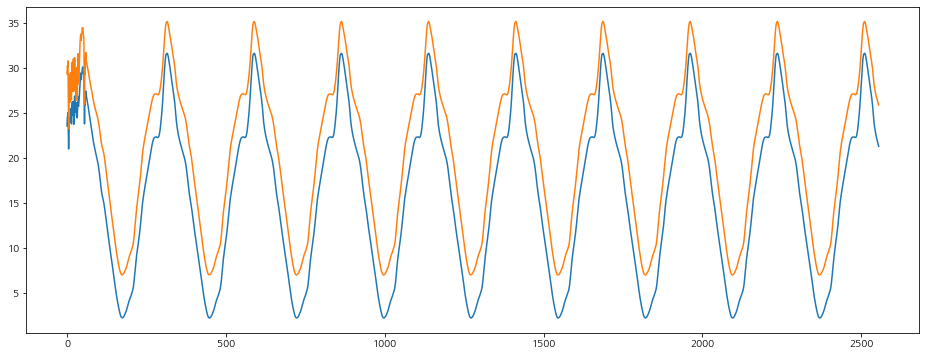

In [47]:
fig, axe = plt.subplots(figsize = (16, 6))
axe.plot(test_pred)